<a href="https://colab.research.google.com/github/Sriharish19/Bike-Demand-Prediction/blob/main/SH_Bike_Sharing_Demand_Prediction_ML_Capstone_Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV


from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score,auc
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

import math

In [2]:
# Mounting the drive
from google.colab import drive
drive.mount('/content/My_drive')

Mounted at /content/My_drive


In [3]:
# Loading the file
df = pd.read_csv('/content/My_drive/MyDrive/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')
df1 = pd.read_csv('/content/My_drive/MyDrive/Copy of SeoulBikeData.csv',encoding= 'unicode_escape')

In [4]:
# dataframe shape
df.shape

(8760, 14)

In [5]:
# top 5 rows in the dataframe
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [6]:
# bottom 5 rows in the dataframe
df.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,30/11/2018,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [7]:
# Duplicates
df.duplicated().sum()

0

In [8]:
# Null values
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

In [9]:
# Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [10]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

In [11]:
# Summary
df.describe([0.95,0.98,0.99])

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
95%,2043.000000,22.000000,30.700000,94.000000,3.700000,2000.000000,22.405000,2.560000,0.400000,0.200000
98%,2355.000000,23.000000,33.600000,97.000000,4.300000,2000.000000,23.900000,2.960000,2.000000,1.300000
99%,2526.230000,23.000000,35.100000,97.000000,4.700000,2000.000000,24.700000,3.170000,4.000000,2.500000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [12]:
# Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
# Numerical variables
df.describe().columns

Index(['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'],
      dtype='object')

In [14]:
# Categorical variables
columns = df.columns.tolist()
numerical_variables = df.describe().columns.tolist()

categorical_variables = [var for var in columns]
for var in columns:
  if var in numerical_variables:
    categorical_variables.remove(var)
print(categorical_variables)
print(numerical_variables)

['Date', 'Seasons', 'Holiday', 'Functioning Day']
['Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']


In [15]:
# Removing date column
df.drop('Date',axis = 1,inplace = True)

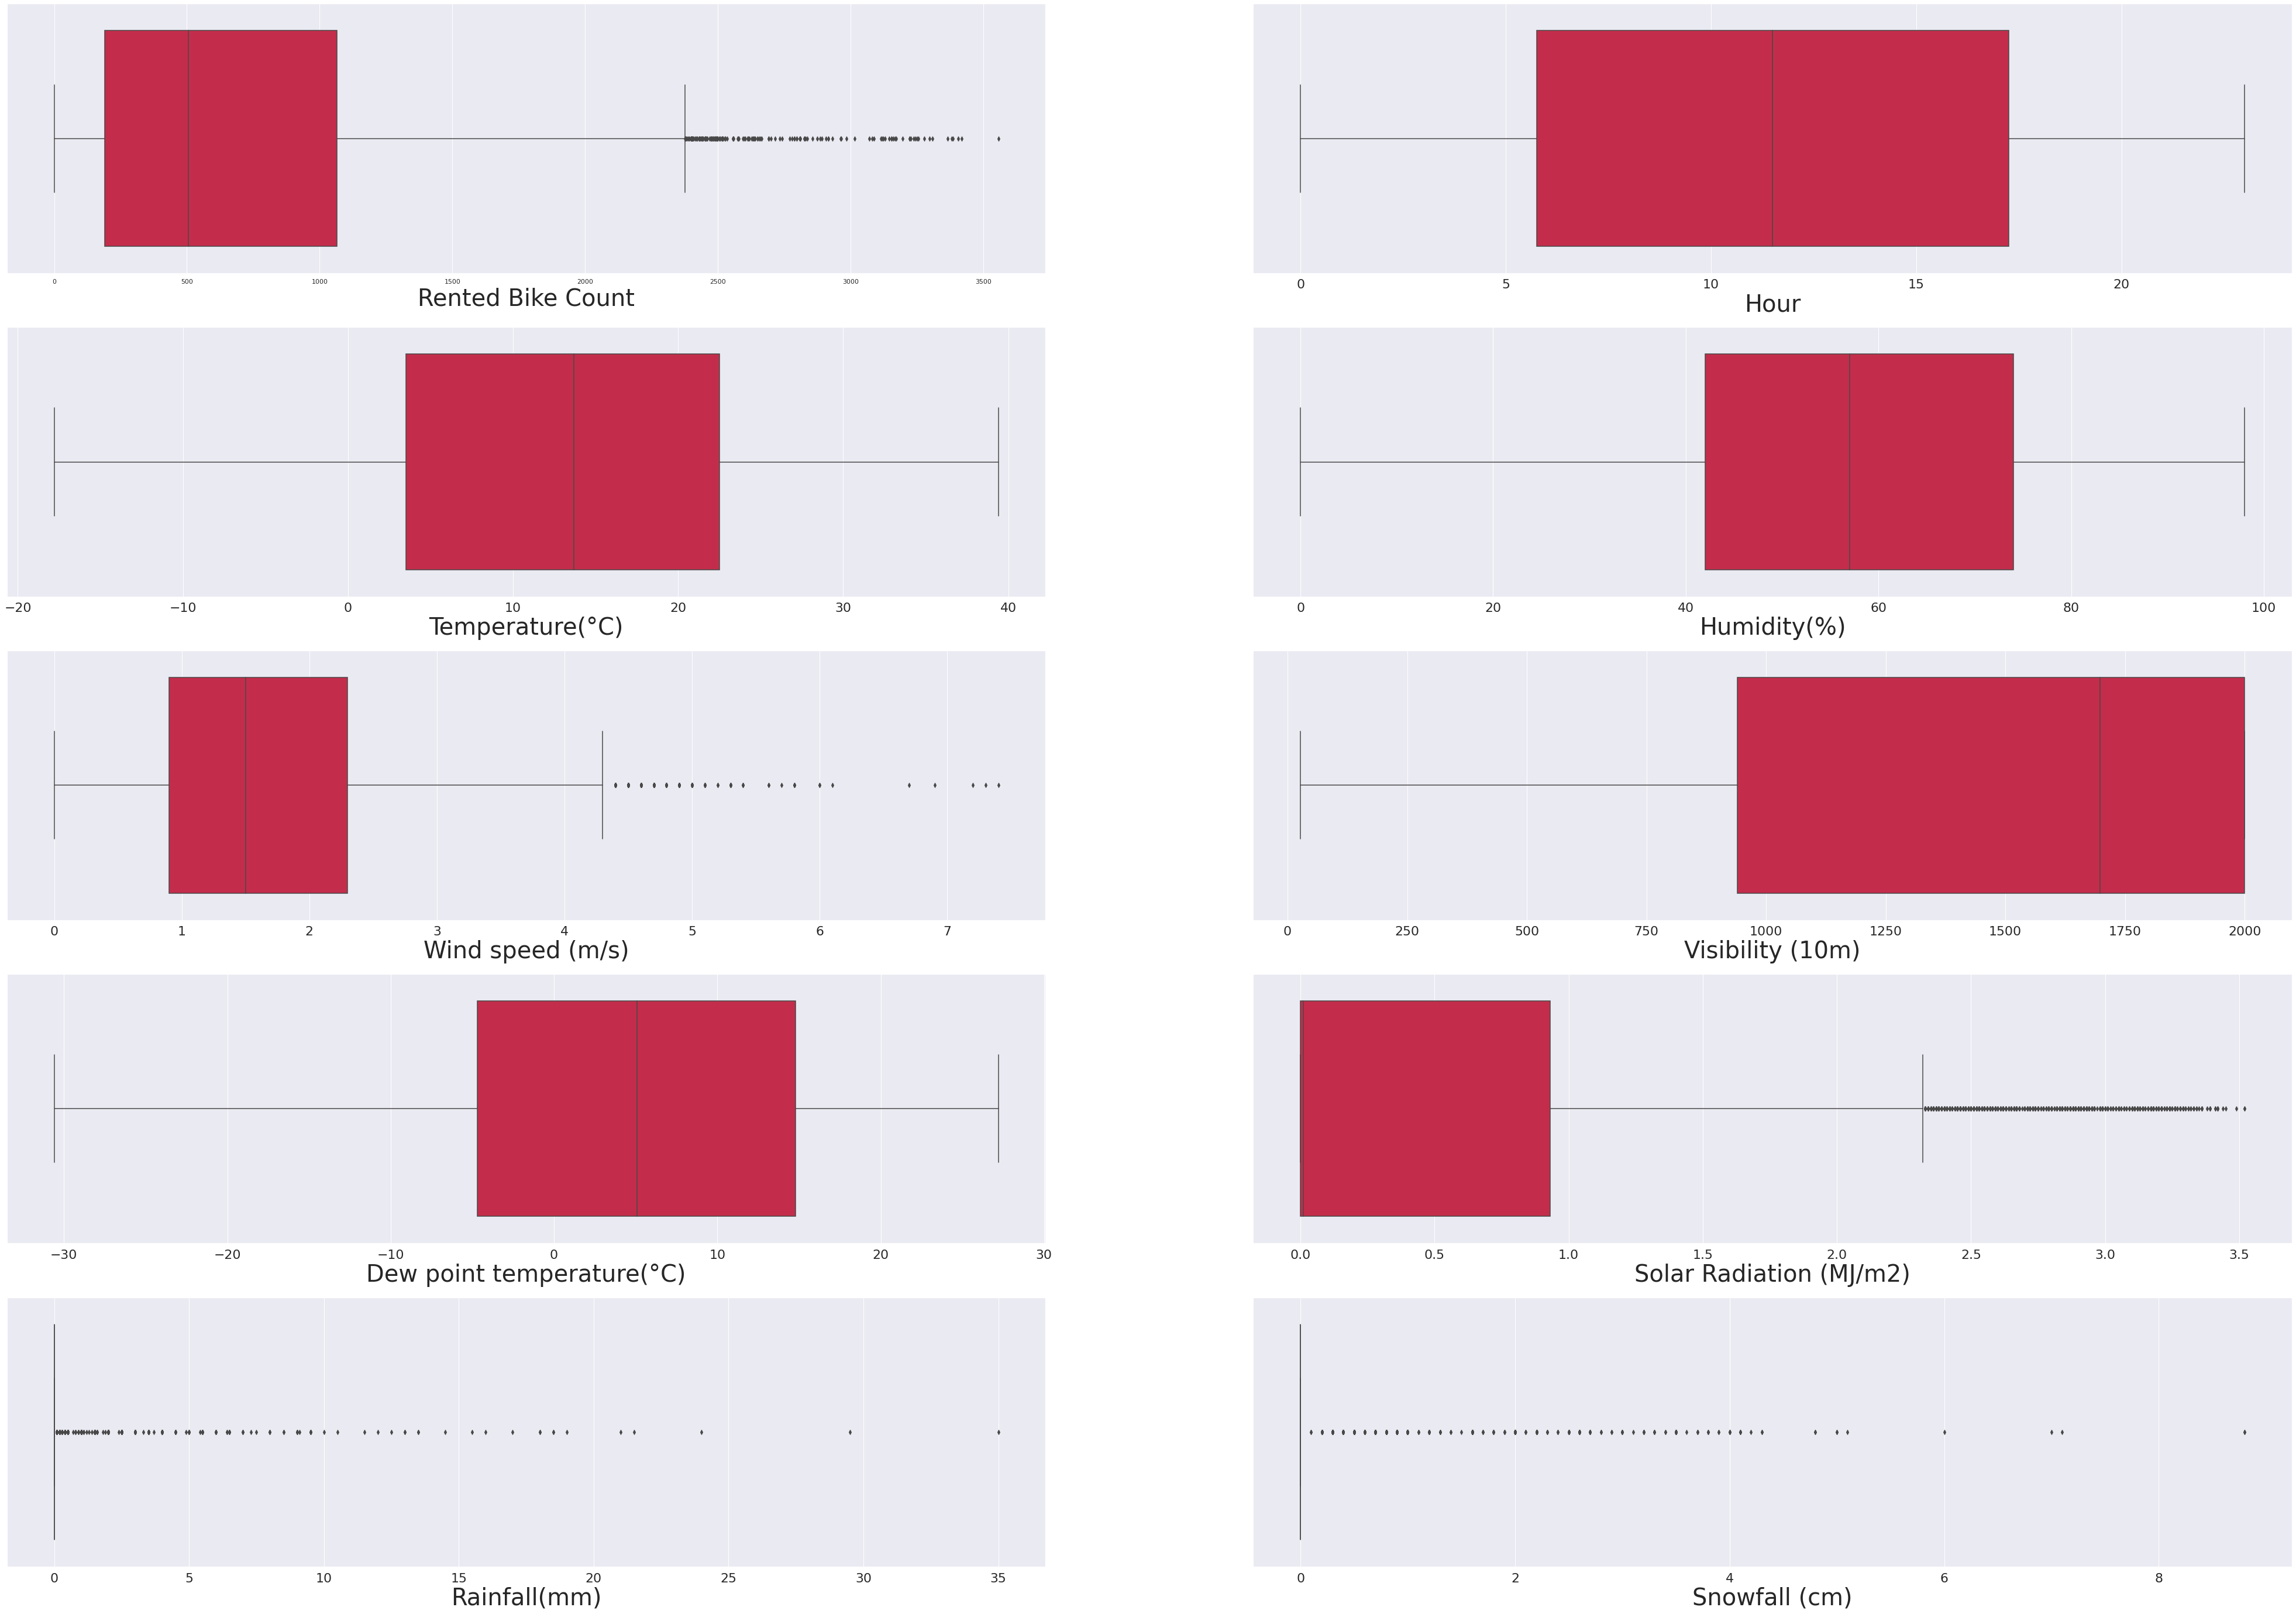

In [16]:
# Box plot to detect outliers
lst_box = numerical_variables
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='crimson')
    plt.xlabel(i[1],fontsize=40)

In [17]:
# Z Score based technique to remove outliers
lst = ['Rented Bike Count','Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)']
for i in lst:
  lower_limit = df[i].mean() - 3*df[i].std()
  print(i+'Lower_limit:',round(lower_limit,2))  
  upper_limit = df[i].mean() + 3*df[i].std()
  print(i+'Upper_limit:',round(upper_limit,2))
  df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

Rented Bike CountLower_limit: -1230.39
Rented Bike CountUpper_limit: 2639.59
Temperature(°C)Lower_limit: -22.95
Temperature(°C)Upper_limit: 48.72
Humidity(%)Lower_limit: -2.86
Humidity(%)Upper_limit: 119.31
Wind speed (m/s)Lower_limit: -1.38
Wind speed (m/s)Upper_limit: 4.83
Visibility (10m)Lower_limit: -388.07
Visibility (10m)Upper_limit: 3261.72
Dew point temperature(°C)Lower_limit: -35.11
Dew point temperature(°C)Upper_limit: 43.25
Solar Radiation (MJ/m2)Lower_limit: -2.04
Solar Radiation (MJ/m2)Upper_limit: 3.18


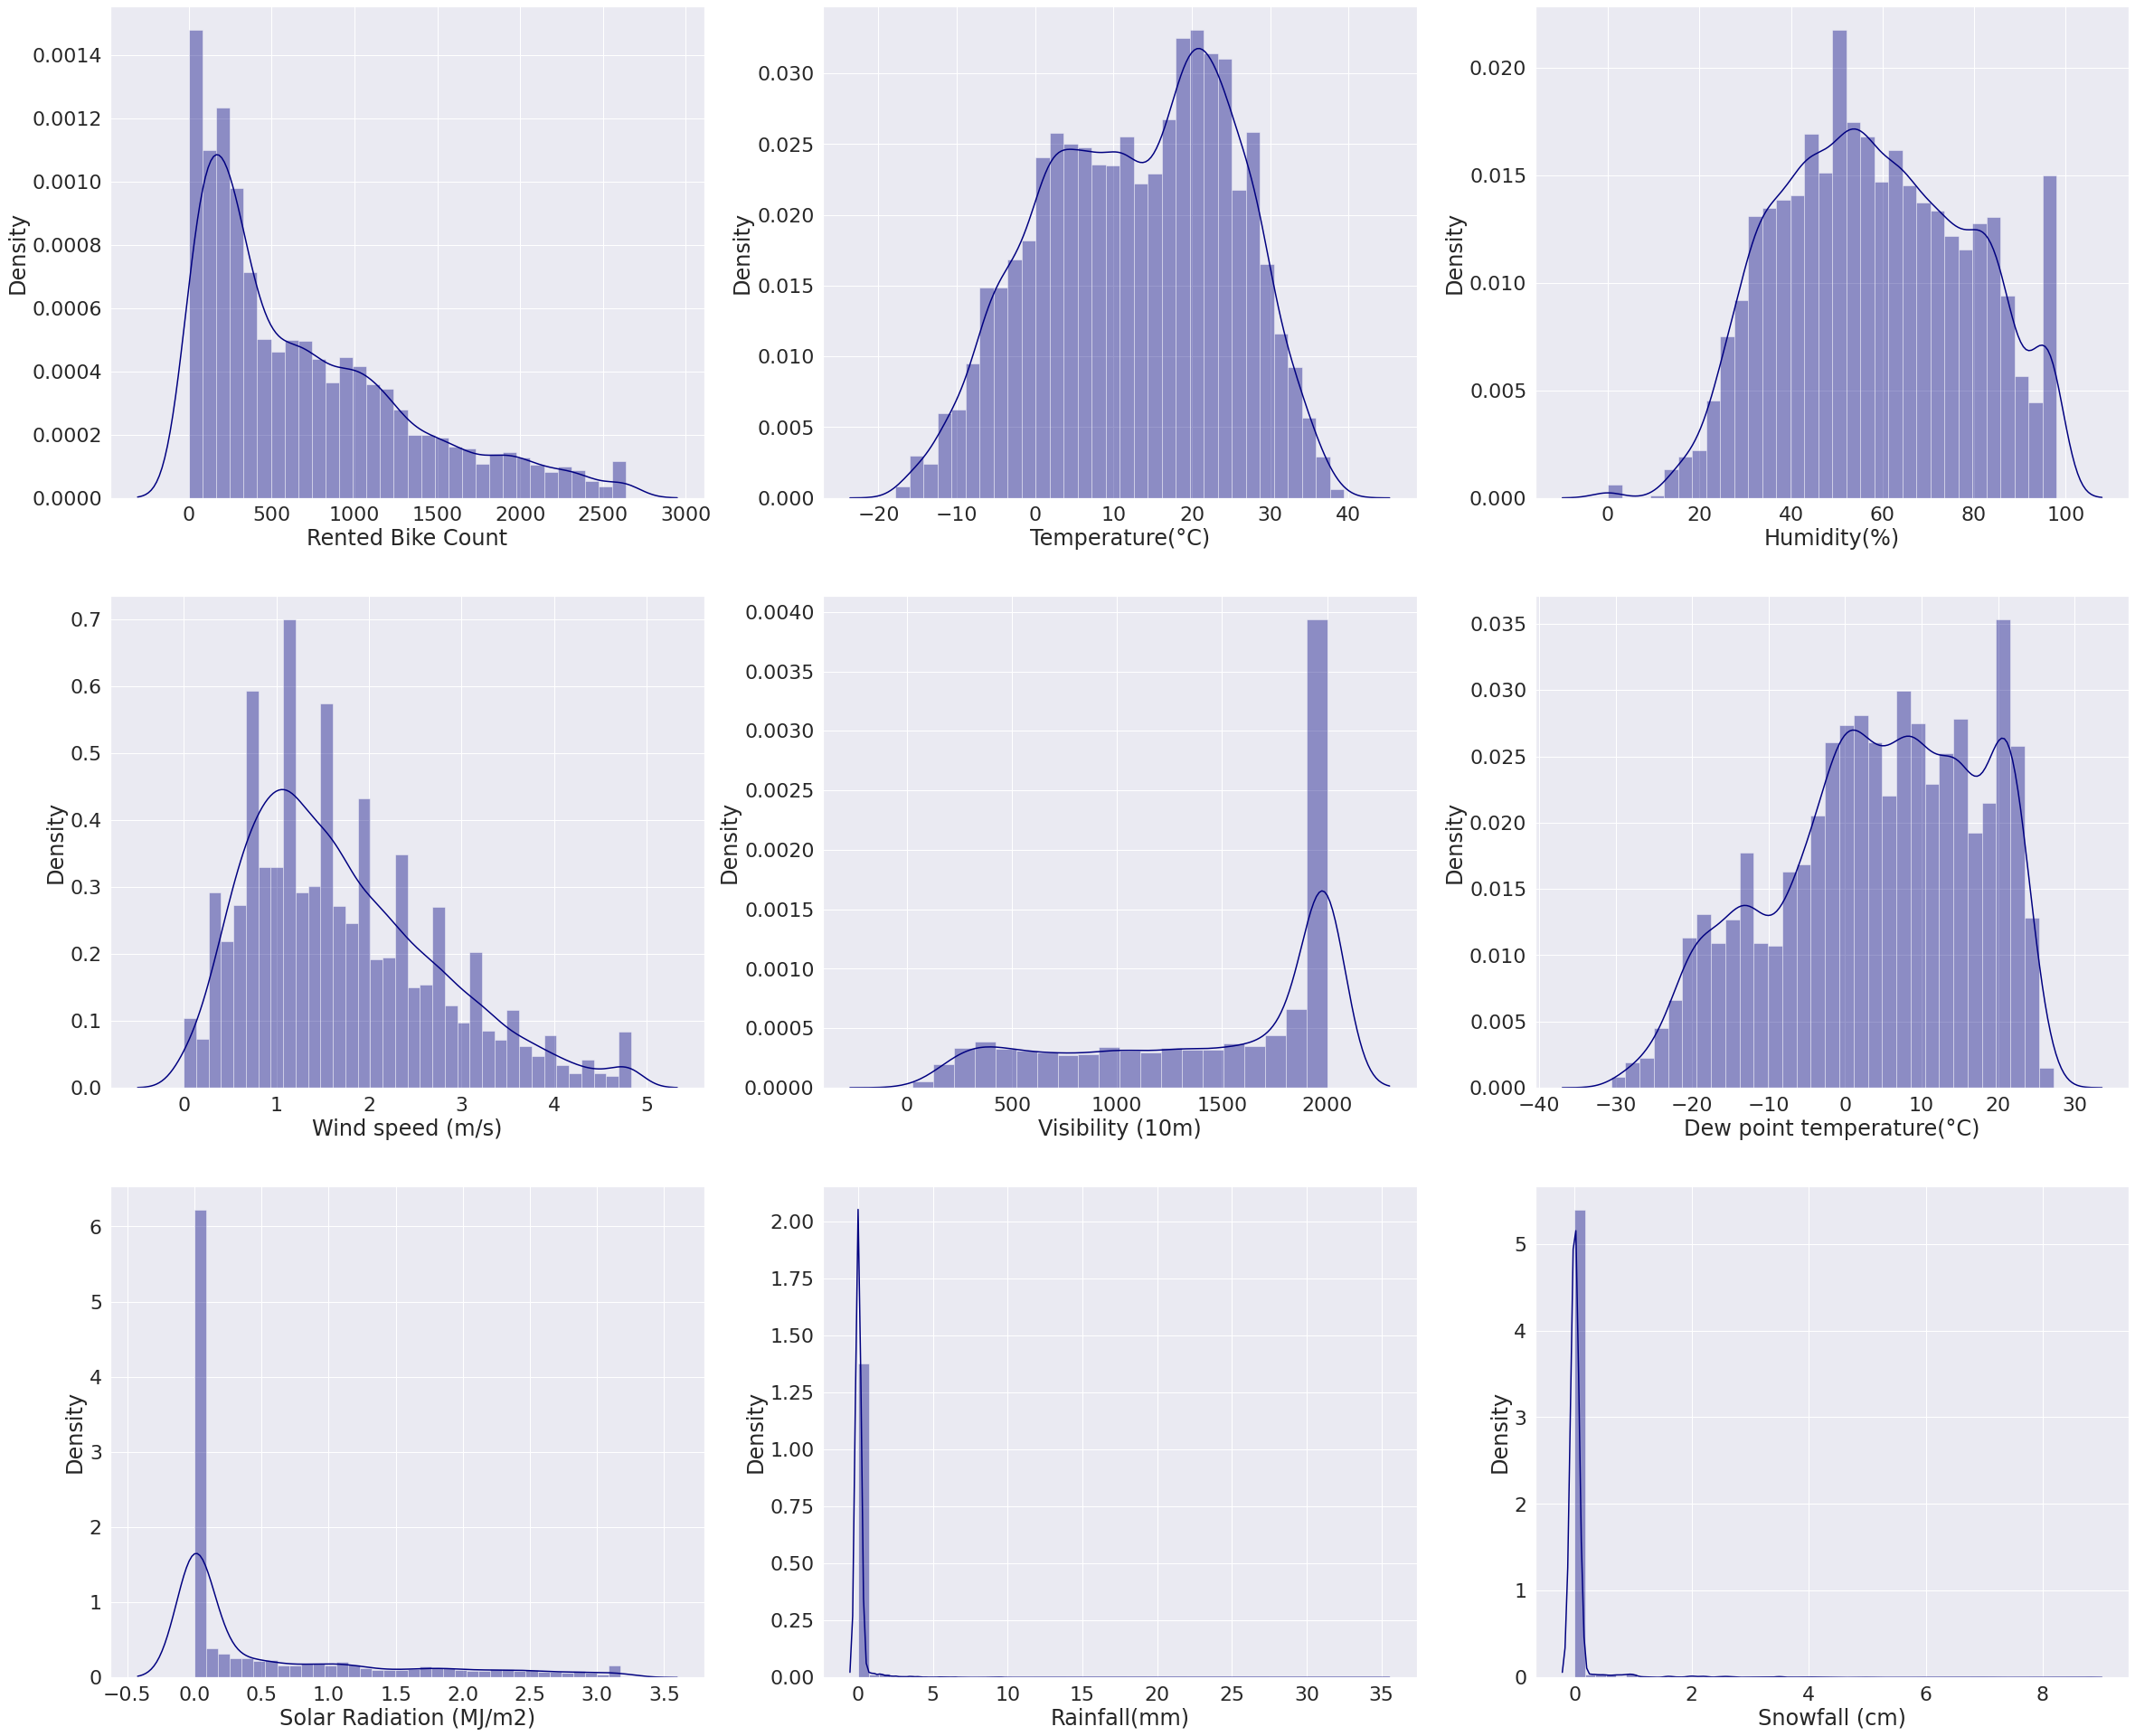

In [18]:
# Distribution plot for numerical variables
lst_dist = numerical_variables
numerical_variables.remove('Hour')
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 2)
  plt.subplot(6, 3,i[0]+1)
  sns.distplot(df[i[1]],color = 'navy')

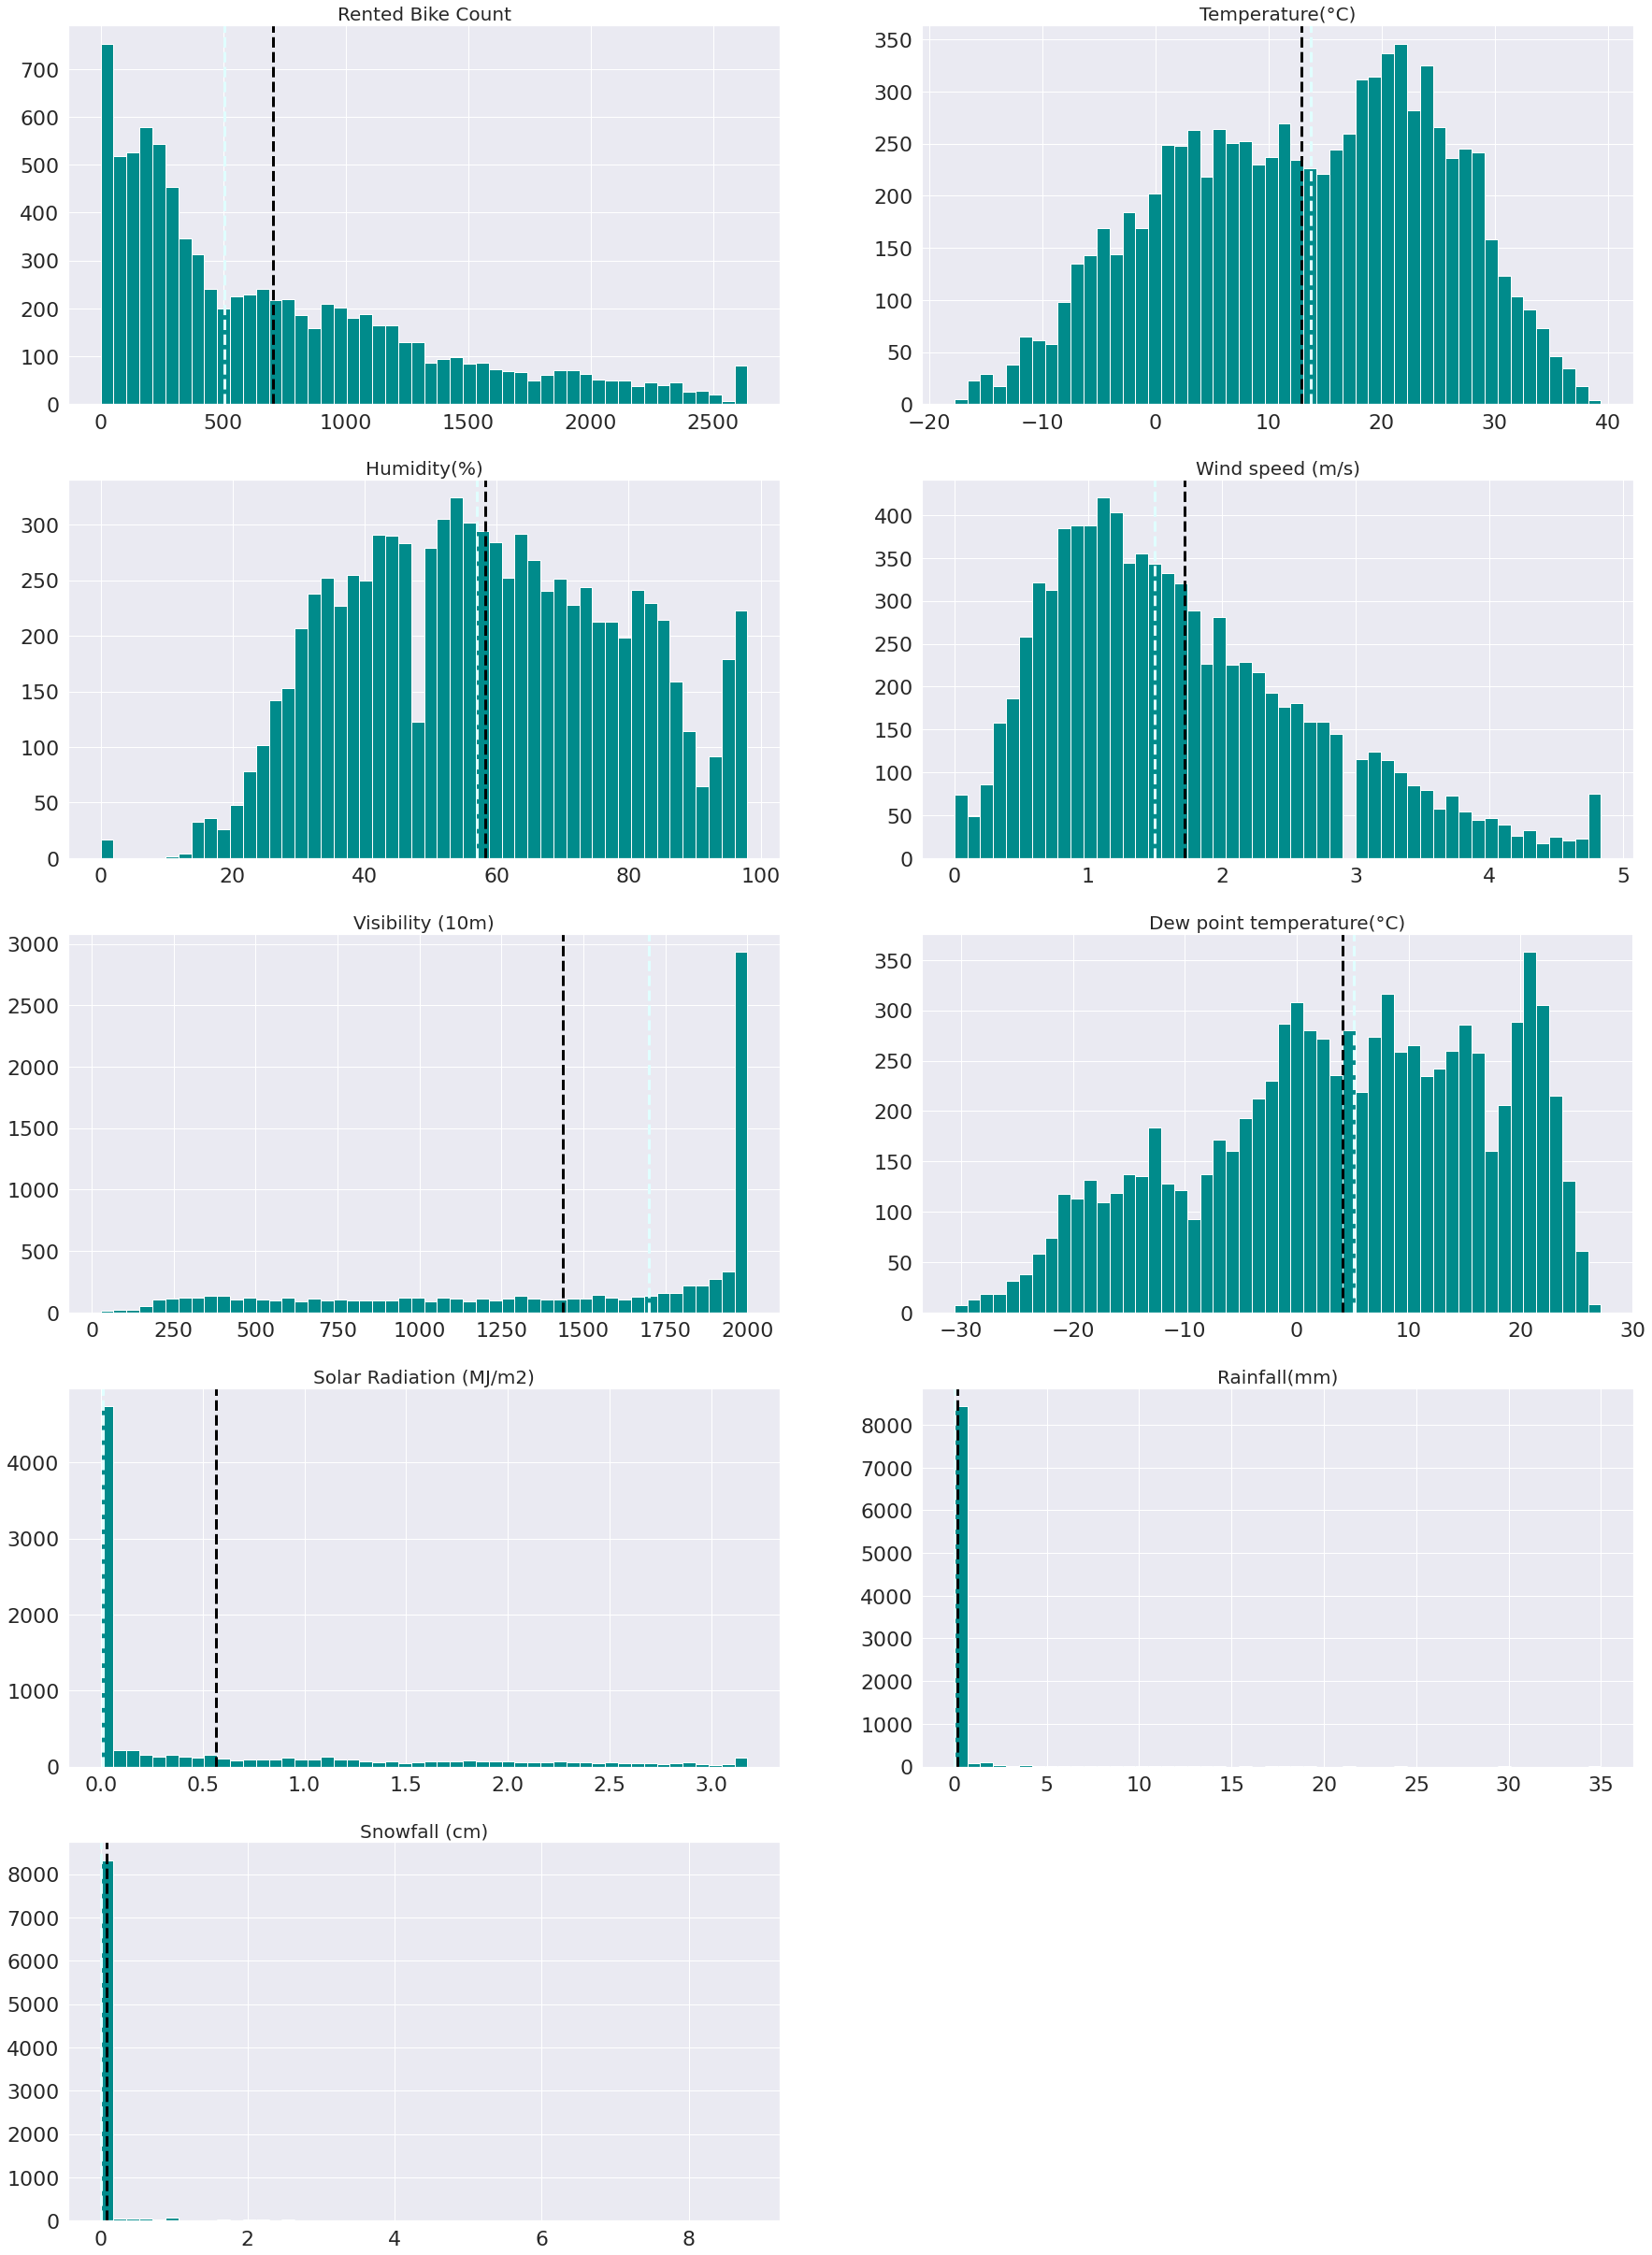

In [19]:
# Calculating mean and median

# numerical_variables.remove('Hour')
plt.figure(figsize = (30,70))

for i in enumerate(numerical_variables):
  plt.subplot(8, 2,i[0]+1)
  feature = df[i[1]]
  feature.hist(bins=50,color = 'darkcyan')
  plt.axvline(feature.mean(),color = 'black',linestyle='dashed', linewidth=3)
  plt.axvline(feature.median(),color = 'lightcyan',linestyle='dashed',linewidth=3)
  plt.title(i[1],fontsize = 20)

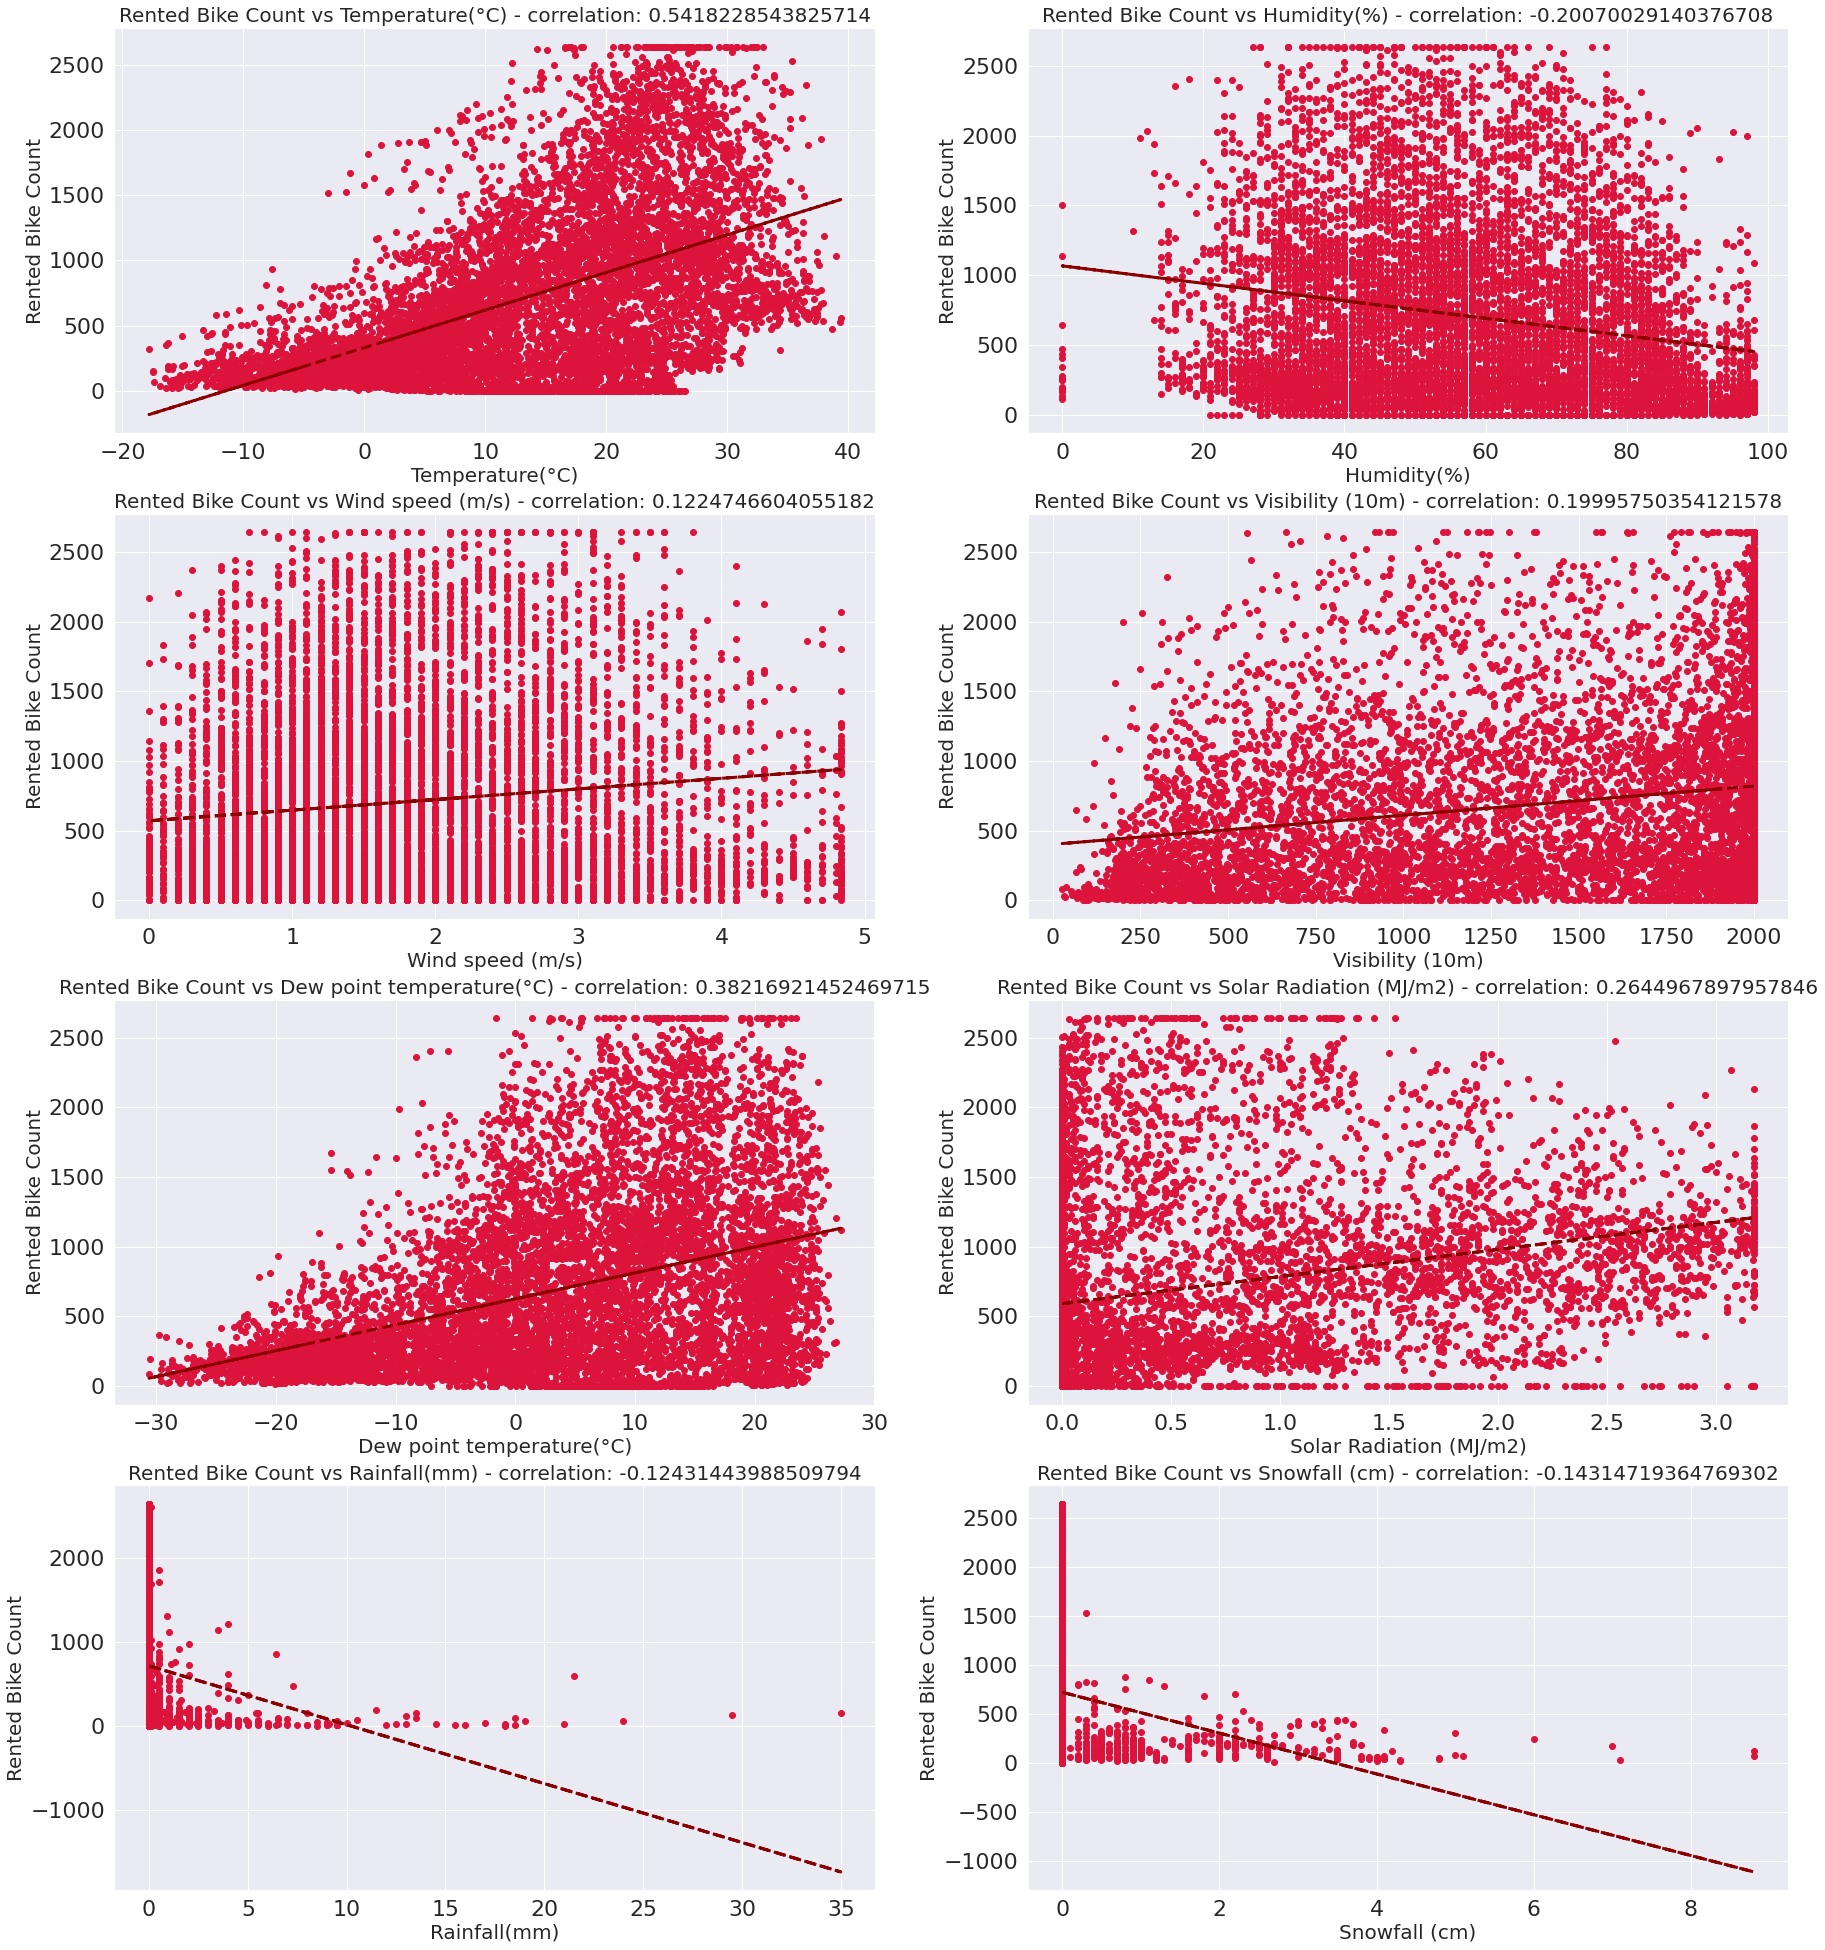

In [20]:
# Plotting scatter plot and correlation

plt.figure(figsize = (30,70))

numerical_variables.remove('Rented Bike Count')
for i in enumerate(numerical_variables):
  plt.subplot(8, 2,i[0]+1)
  feature = df[i[1]]
  label = df['Rented Bike Count']
  correlation = feature.corr(label)
  plt.scatter(x=feature, y=label,color = 'crimson',alpha = 1)
  plt.xlabel(i[1],fontsize = 20)
  plt.ylabel('Rented Bike Count',fontsize = 20)
  plt.title('Rented Bike Count' + ' vs '  + i[1] + ' - correlation: ' + str(correlation),fontsize = 20)
  z = np.polyfit(df[i[1]], df['Rented Bike Count'], 1)
  y_hat = np.poly1d(z)(df[i[1]])
  plt.plot(df[i[1]], y_hat, "r--", lw=3,color = 'darkred')

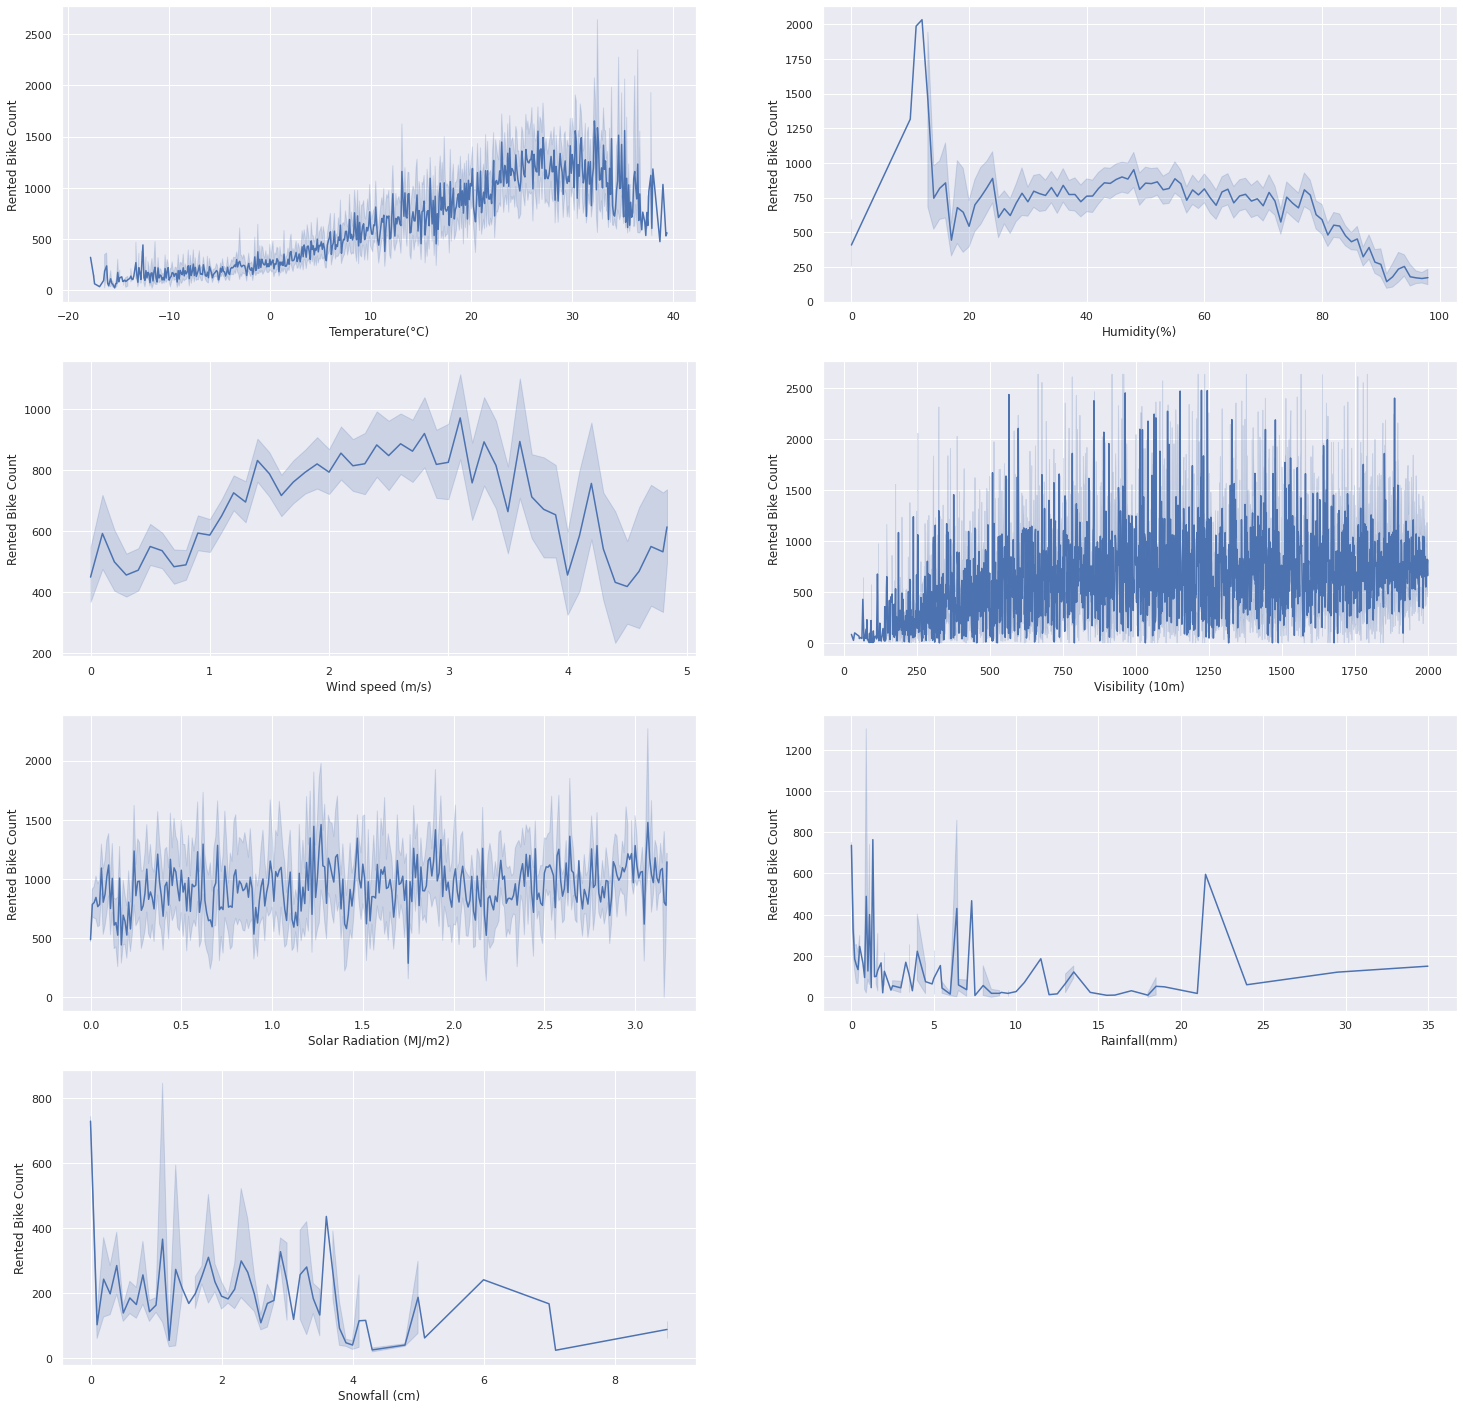

In [21]:
# line plot for numerical variables
ee = ['Temperature(°C)',	'Humidity(%)',	'Wind speed (m/s)',	'Visibility (10m)',	'Solar Radiation (MJ/m2)',	'Rainfall(mm)',	'Snowfall (cm)']
sns.set_theme(style="darkgrid")
plt.figure(figsize = (25, 25))
for i in enumerate(ee):
  plt.subplot(4,2,i[0]+1)
  sns.lineplot(x=df[i[1]],y='Rented Bike Count',data=df,palette='Grouped')

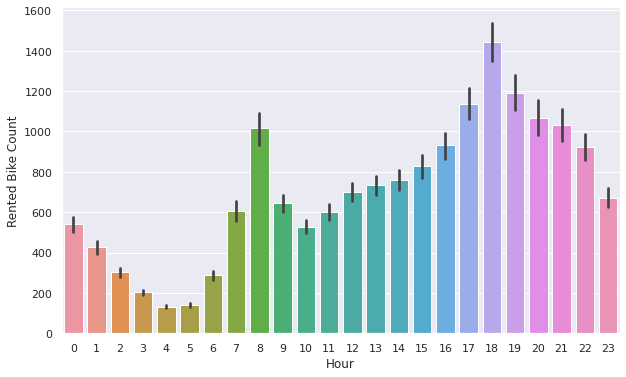

In [22]:
# Bar graph for hourly bike count
plt.figure(figsize=(10,6))
sns.barplot(x='Hour',y='Rented Bike Count',data=df)

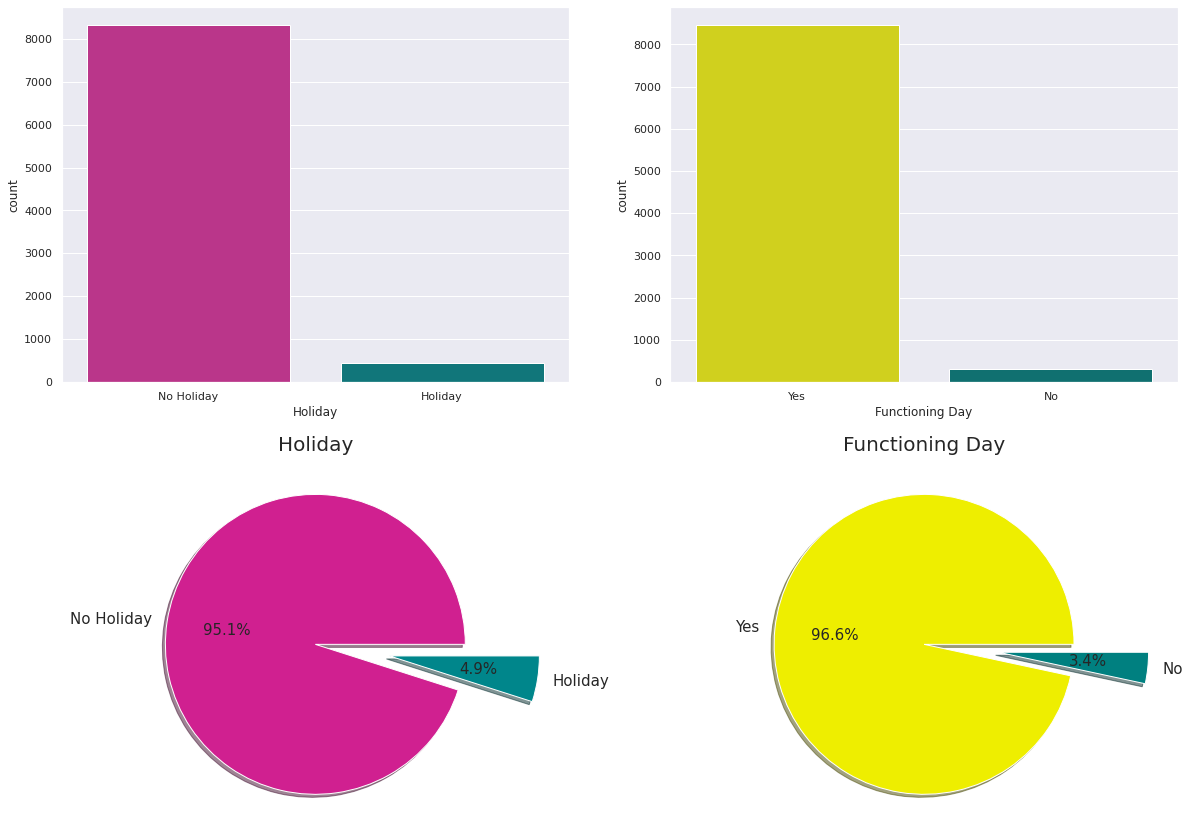

In [23]:
# Count Plot & pie chart for Holiday and functioning day
categorical_var_count = ['Holiday', 'Functioning Day','Holiday', 'Functioning Day']
plt.figure(figsize = (20,40))
sns.set_theme()
color = [['#D02090','#00868B'],['#EEEE00','#008080'],['#D02090','#00868B'],['#EEEE00','#008080']]
for i in enumerate(categorical_var_count):
  if i[0]<=1 :
    plt.subplot(5, 2,i[0]+1)
    sns.countplot(data = df, x = df[i[1]],palette= color[i[0]])
  else:
    plt.subplot(5, 2,i[0]+1)
    valuesh= df[i[1]].value_counts().tolist()
    labelh = df[i[1]].value_counts().index.tolist()
    plt.pie(valuesh ,labels=labelh , radius=1,explode = [0,0.5],colors=color[i[0]] ,textprops={'fontsize': 15}, autopct='%0.1f%%',shadow=True)
    plt.rcParams['figure.figsize']=(9,8)
    plt.title(i[1],fontsize = 20)


In [24]:
#Convert the Date column in Datetime Dtype

df1['Date']=pd.to_datetime(df1['Date'],format='%d/%m/%Y')

#Breaking Down the Date into 3 Components
df1['Day']=df1['Date'].dt.day_name()
df1['Month']=df1['Date'].dt.month
df1['Year']=df1['Date'].dt.year


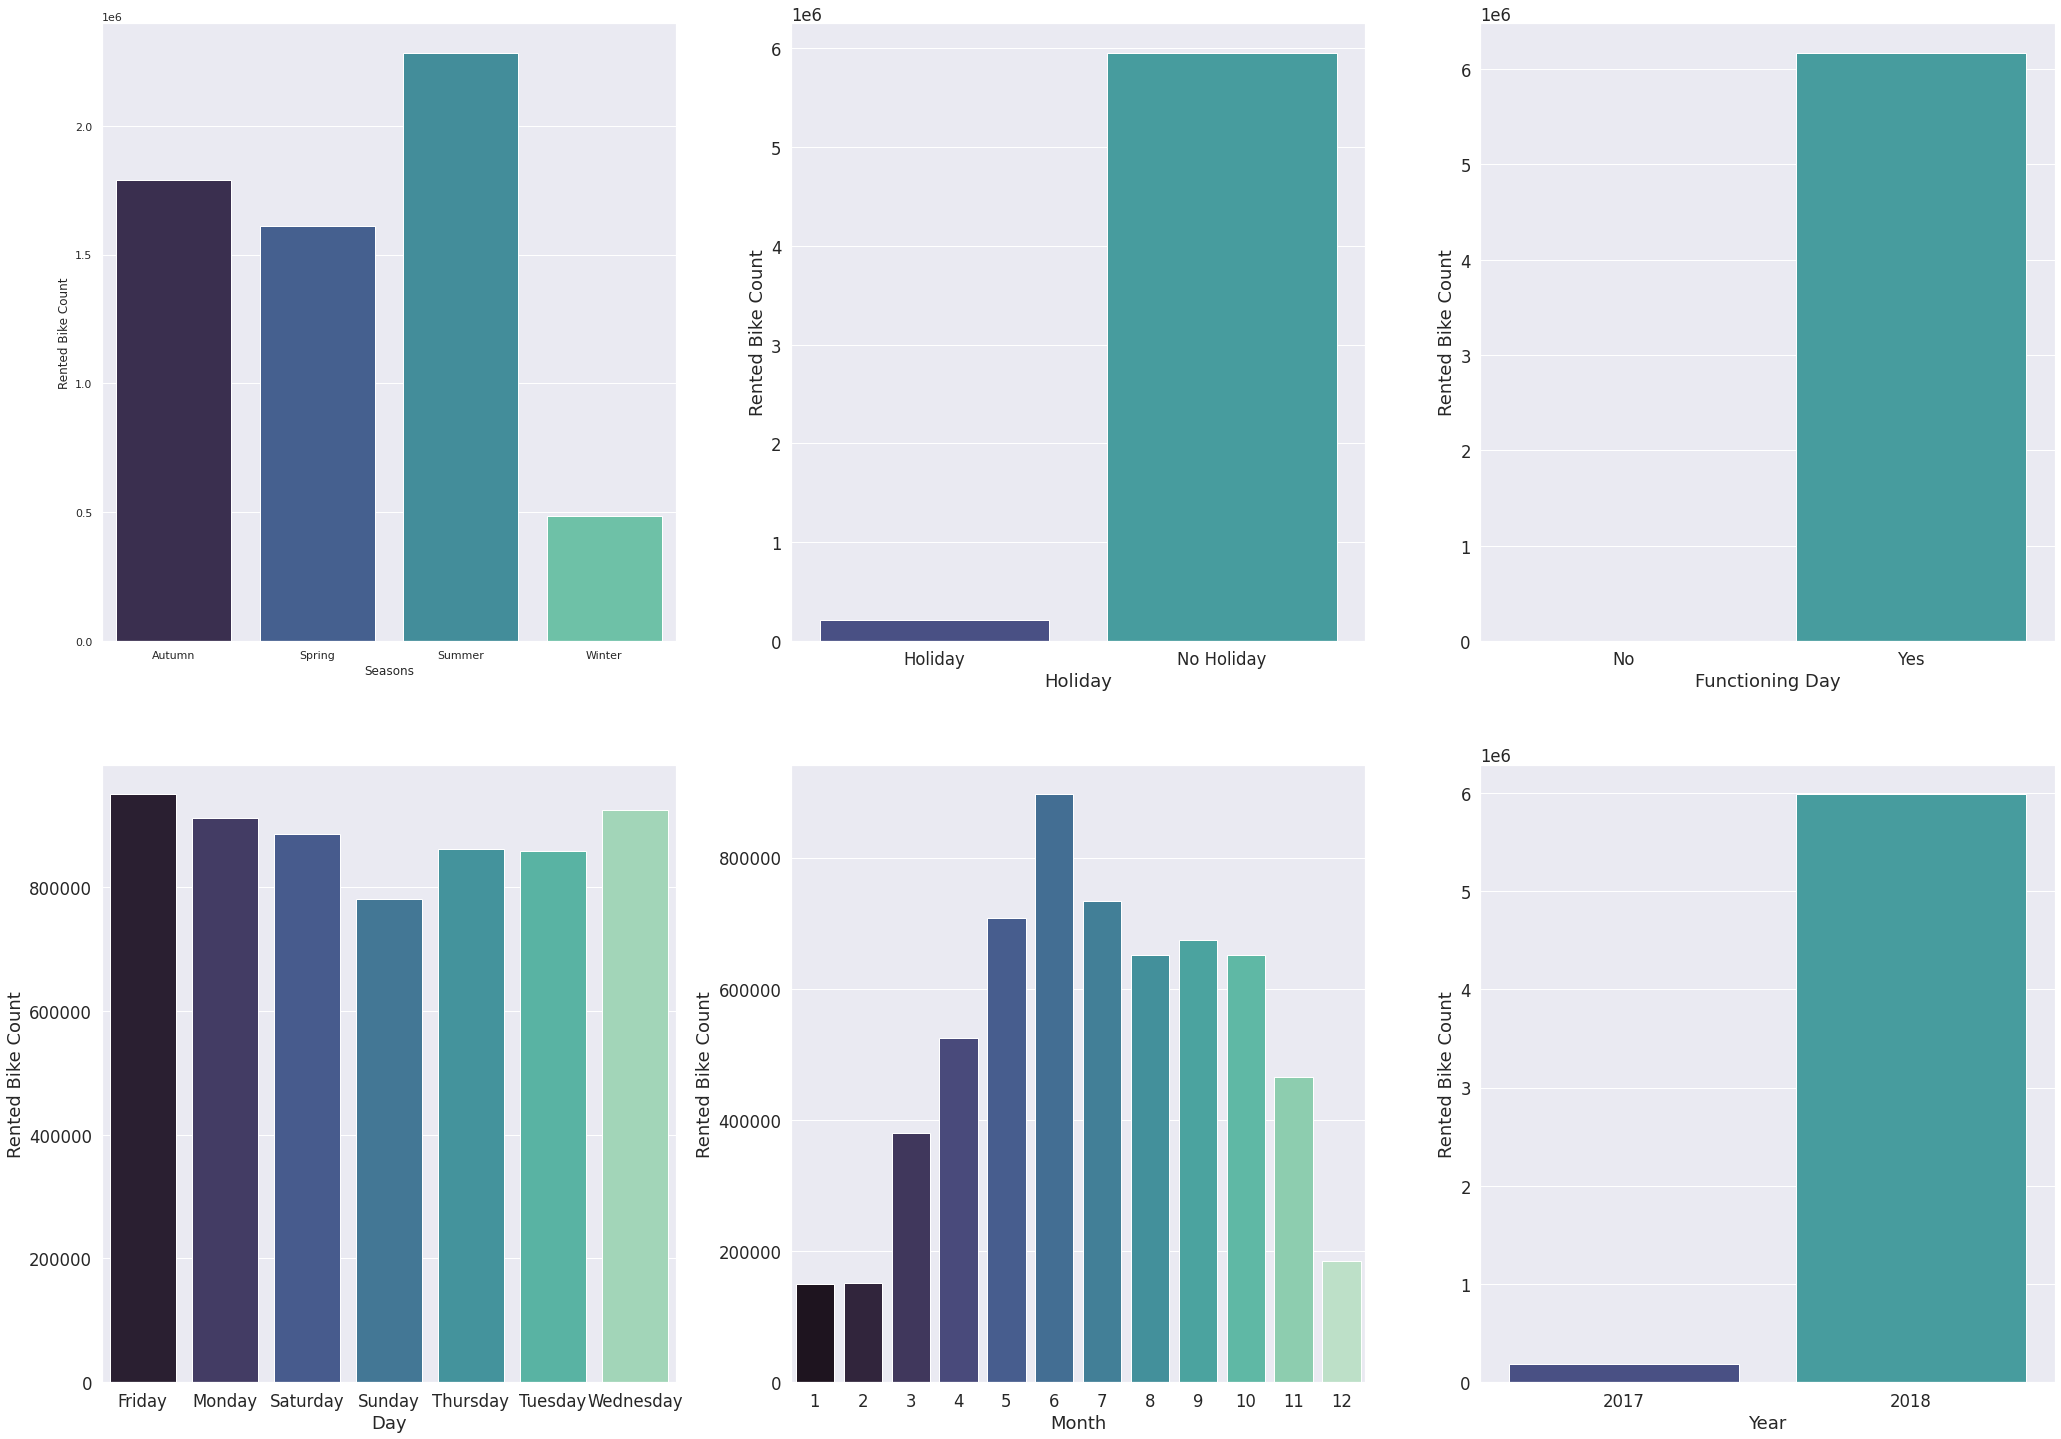

In [25]:
# Rented Bike Counts
seasons = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Seasons']).sum()).reset_index()
holiday = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Holiday']).sum()).reset_index()
Functioning_Day = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Functioning Day']).sum()).reset_index()
Day = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Day']).sum()).reset_index()
Month = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Month']).sum()).reset_index()
Year = pd.DataFrame(df1['Rented Bike Count'].groupby(df1['Year']).sum()).reset_index()
lst_dp = [seasons,holiday,Functioning_Day,Day,Month,Year]
lst_ft = ['Seasons','Holiday','Functioning Day','Day','Month','Year']

plt.figure(figsize = (35, 25))

for i in enumerate(lst_dp):
    plt.subplot(2,3,i[0]+1)
    sns.set(font_scale = 1.5)
    sns.barplot(x = lst_ft[i[0]],y ='Rented Bike Count',data = lst_dp[i[0]],palette='mako')

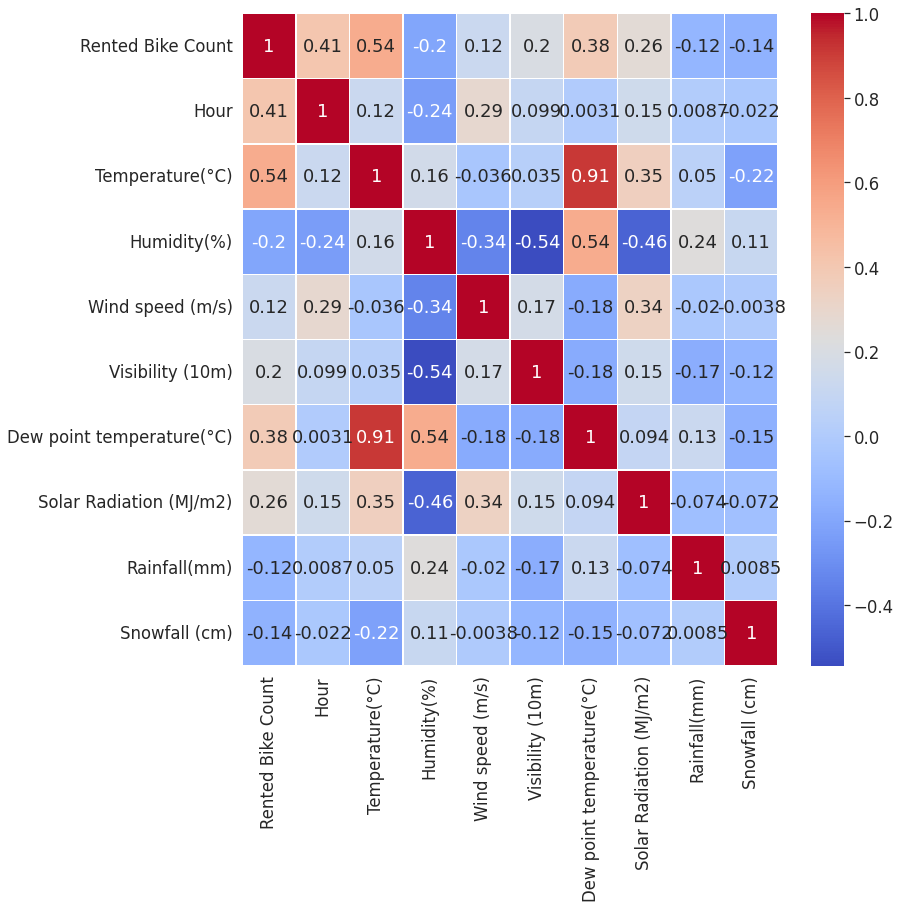

In [26]:
# Multicolinearity
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df.corr(), annot=True, linewidths=.5 , ax=ax,cmap="coolwarm")
plt.show()

In [27]:
# There exists a high multicollinearity between Temperature and Dew point Temperature
# Lets create a feature new feature Temperature which comprises the addition of temperature and dew point temperature

#df['Temperature'] = df['Temperature(°C)'] + df['Dew point temperature(°C)']
#df.drop('Temperature(°C)',axis = 1,inplace = True)
df3=df1.drop(['Date','Dew point temperature(°C)'],axis = 1)

In [28]:
# Varinace Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

calc_vif(df[[i for i in df.describe().columns if i not in ['Date','Rented Bike Count']]])

,variables,VIF
0,Hour,4.421829
1,Temperature(°C),33.431756
2,Humidity(%),5.390747
3,Wind speed (m/s),4.903021
4,Visibility (10m),9.089457
5,Dew point temperature(°C),17.156495
6,Solar Radiation (MJ/m2),2.892990
7,Rainfall(mm),1.081562
8,Snowfall (cm),1.120838


Text(0.5, 1.0, 'Square root')

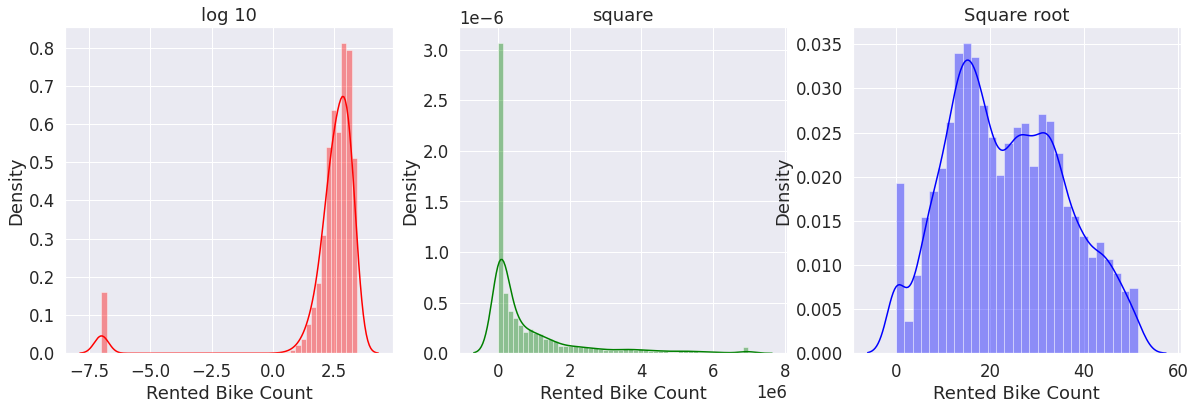

In [29]:
# Normalising dependant variable 
fig,axes = plt.subplots(1,3,figsize=(20,6))
sns.set_style("whitegrid")
sns.distplot(np.log10(df['Rented Bike Count']+0.0000001),ax=axes[0],color='red').set_title("log 10")
sns.distplot((df['Rented Bike Count']**2),ax=axes[1],color='green').set_title("square")
sns.distplot(np.sqrt(df['Rented Bike Count']),ax=axes[2], color='blue').set_title("Square root")

In [30]:
# Binning hours column
df3['morning_hours']=df['Hour'].apply(lambda x: 1 if x>=0 and x<8 else 0)
df3['afternoon_hours']=df['Hour'].apply(lambda x: 1 if x>=8 and x<16 else 0)
df3['evening_hours']=df['Hour'].apply(lambda x: 1 if x>=16 and x<24 else 0)

# Binning of highly imbalanced features

#df3['nVisibility']=df['Visibility (10m)'].apply(lambda x: 1 if x>=1650 else 0)
#df3['nRainfall']=df['Rainfall(mm)'].apply(lambda x:1 if x<2 else 0)
#df3['nSnowfall']=df['Snowfall (cm)'].apply(lambda x:1 if x<=1 else 0)
#df3['nSolar_Radiation']=df['Solar Radiation (MJ/m2)'].apply(lambda x:1 if x<=0.2 else 0)


In [31]:
# One hot encoding
data = pd.get_dummies(df3,columns = ['Hour','Seasons','Holiday','Functioning Day','Day'])
data.drop(['Hour_0','Seasons_Autumn','Holiday_Holiday','Functioning Day_No','Day_Sunday',
           'morning_hours'],axis = 1,inplace = True)
data.head()

,Rented Bike Count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Year,...,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Day_Friday,Day_Monday,Day_Saturday,Day_Thursday,Day_Tuesday,Day_Wednesday
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,12,2017,...,0,1,1,1,1,0,0,0,0,0
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,12,2017,...,0,1,1,1,1,0,0,0,0,0
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,12,2017,...,0,1,1,1,1,0,0,0,0,0
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,12,2017,...,0,1,1,1,1,0,0,0,0,0
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,12,2017,...,0,1,1,1,1,0,0,0,0,0


In [32]:
# Columns
data.columns

Index(['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)',
       'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Year', 'afternoon_hours',
       'evening_hours', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5',
       'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12',
       'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18',
       'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring',
       'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday',
       'Functioning Day_Yes', 'Day_Friday', 'Day_Monday', 'Day_Saturday',
       'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday'],
      dtype='object')

In [33]:
independent_variables = data.columns.tolist()
independent_variables.remove('Rented Bike Count')
# independent_variables.remove('Date')

dependent_variable = ['Rented Bike Count']
print(independent_variables)
print(dependent_variable)

['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Month', 'Year', 'afternoon_hours', 'evening_hours', 'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7', 'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13', 'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19', 'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'Holiday_No Holiday', 'Functioning Day_Yes', 'Day_Friday', 'Day_Monday', 'Day_Saturday', 'Day_Thursday', 'Day_Tuesday', 'Day_Wednesday']
['Rented Bike Count']


In [34]:
X = data[independent_variables].values
y =np.sqrt(df['Rented Bike Count'])

In [35]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6570, 45)
(2190, 45)
(6570,)
(2190,)


In [36]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size = 0.25, random_state = 0)


In [37]:
#Creating function with parameters-model,independent variable dataframe and dependent variable dataframe
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train)

    print(f'Train R^2 score is {model.score(X_train,y_train)}')
    print(f'Train Adj R^2 is {1-(1-model.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)}')
    print(f'Train RMSE is: {mean_squared_error(y_train,y_pred_train,squared=False)}')
    print(' ')    
    print(f'Test R^2 is {model.score(X_test,y_test)}')
    print(f'Test Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
    print(f'Test RMSE is: {mean_squared_error(y_test,y_pred_test,squared=False)}')

In [38]:
model=LinearRegression().fit(X_train,y_train)

In [39]:
predict(LinearRegression(),X,y)

Train R^2 score is 0.7570950612010796
Train Adj R^2 is 0.7554195979506272
Train RMSE is: 6.109421984097278
 
Test R^2 is 0.7593713171799338
Test Adj R^2 is 0.7543208084453707
Test RMSE is: 6.064572434214715


In [40]:
predict(Ridge(),X,y)

Train R^2 score is 0.75709467475263
Train Adj R^2 is 0.7554192088366074
Train RMSE is: 6.109426843973174
 
Test R^2 is 0.759345527988796
Test Adj R^2 is 0.7542944779699041
Test RMSE is: 6.064897408414682


In [41]:
predict(Lasso(),X,y)

Train R^2 score is 0.658557576790574
Train Adj R^2 is 0.6562024405176703
Train RMSE is: 7.243370345585066
 
Test R^2 is 0.6523517872776301
Test Adj R^2 is 0.645055066394931
Test RMSE is: 7.289479033835831


In [42]:
predict(DecisionTreeRegressor(),X,y)

Train R^2 score is 1.0
Train Adj R^2 is 1.0
Train RMSE is: 1.1157451977586e-15
 
Test R^2 is 0.8367395652509145
Test Adj R^2 is 0.8333129236633637
Test RMSE is: 4.995361990591243


In [43]:
predict(RandomForestRegressor(),X,y)

Train R^2 score is 0.9875915564666886
Train Adj R^2 is 0.9875059678770198
Train RMSE is: 1.3808312437332453
 
Test R^2 is 0.9069496734786856
Test Adj R^2 is 0.9049966582298707
Test RMSE is: 3.7712510264923744


In [44]:
predict(GradientBoostingRegressor(),X,y)

Train R^2 score is 0.8860757407183575
Train Adj R^2 is 0.8852899357417061
Train RMSE is: 4.183984409457517
 
Test R^2 is 0.869274514243469
Test Adj R^2 is 0.8665307423875717
Test RMSE is: 4.469990733396888


In [45]:
predict(KNeighborsRegressor(),X,y)

Train R^2 score is 0.8535080650438267
Train Adj R^2 is 0.8524976209799047
Train RMSE is: 4.744482057084613
 
Test R^2 is 0.7694109705243447
Test Adj R^2 is 0.7645711821258352
Test RMSE is: 5.936709680325446


In [46]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_poly_predicted = poly_model.predict(X_train_poly)
y_test_poly_predict = poly_model.predict(poly_features.fit_transform(X_test))

In [47]:
print('Train r2_score:',r2_score(y_train,y_train_poly_predicted)*100)
print('Test r2_score:',r2_score(y_test, y_test_poly_predict)*100)
print("Adjusted r2_score : ",(1-(1-r2_score(y_test, y_test_poly_predict))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test, y_test_poly_predict))

Train r2_score: 92.67281042717588
Test r2_score: 90.03910607275004
Adjusted r2_score :  89.83003880282176
Mean Squared Error: 15.560535089783256


In [48]:
#GradientBoostingRegressor(n_estimators=400,max_depth=15, min_samples_leaf=30,min_samples_split=500)------>97,94

In [49]:
# Hyperparameter tuned gb
predict(GradientBoostingRegressor(n_estimators=400,max_depth=15, min_samples_leaf=30,
                          min_samples_split=500),X,y)

Train R^2 score is 0.9762463834103813
Train Adj R^2 is 0.9760825402548735
Train RMSE is: 1.9104990316317505
 
Test R^2 is 0.9409714242394717
Test Adj R^2 is 0.9397324849161397
Test RMSE is: 3.00370752821118


In [50]:
# Hyperparameter tuned rf
predict(RandomForestRegressor(n_estimators=300, criterion="squared_error",
                              max_depth=25, min_samples_split=10, 
                              min_samples_leaf=1),X,y)

Train R^2 score is 0.9695823999050796
Train Adj R^2 is 0.9693725911981097
Train RMSE is: 2.161943917013047
 
Test R^2 is 0.9042572540284833
Test Adj R^2 is 0.9022477281102379
Test RMSE is: 3.8254226968086584


In [51]:
# Transforming data

# Normailzation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [52]:
# Linear Regression
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [53]:
print(regressor.intercept_)
print(regressor.coef_)
# y train preds
y_pred_train = regressor.predict(X_train)
y_pred_train

# Predicting the Test set results
y_pred_test = regressor.predict(X_test)
y_pred_test

23.51000491941643
[ 5.22223132e+00 -2.89131016e+00 -1.61639919e-01  5.14205151e-02
  1.06890478e+00 -1.69075047e+00 -5.59603659e-02 -1.57969622e+00
 -2.03609807e+00 -1.29250263e+10 -6.92703158e+10 -4.11915959e-01
 -1.03666719e+00 -1.47871910e+00 -1.88872899e+00 -1.78288542e+00
 -8.52775645e-01  4.03879298e-01  5.48520210e+09  5.51372592e+09
  5.42761831e+09  5.49472965e+09  5.45650050e+09  5.46608762e+09
  5.49472965e+09  5.53264440e+09  2.98275905e+10  2.96755855e+10
  2.83710409e+10  3.00288331e+10  2.84780090e+10  2.97263570e+10
  2.94714542e+10  2.89536176e+10 -2.59179346e+00 -1.91010958e+00
 -5.46333016e+00  7.02945155e-01  4.91950433e+00  9.36858272e-01
  5.38870047e-01  5.74403061e-01  7.90733306e-01  8.92550450e-01
  8.64959714e-01]


array([13.6554123 , 24.28222047, 18.25637208, ..., 36.50599061,
        0.69571076, 34.16050111])

In [54]:
print('Train R2_score           :',r2_score(y_train,y_pred_train)*100)
print('Adjusted train R2_score  :',(1-(1-r2_score(y_train, y_pred_train))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_train, y_pred_train))
print(f'Train RMSE is            : {mean_squared_error(y_train,y_pred_train,squared=False)}')
print(' ') 
print('Test R2_score            :',r2_score(y_test, y_pred_test)*100)
print("Adjusted test R2_score   :",(1-(1-r2_score(y_test, y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_test, y_pred_test))
print(f'Test RMSE is             : {mean_squared_error(y_test,y_pred_test,squared=False)}')

Train R2_score           : 75.27740067796196
Adjusted train R2_score  : 74.75850283771396
Mean Squared Error       : 37.70889408395266
Train RMSE is            : 6.14075680058677
 
Test R2_score            : 77.23468076755697
Adjusted test R2_score   : 76.75686389933871
Mean Squared Error       : 35.563128302918045
Test RMSE is             : 5.963482900362677


In [55]:
# Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_poly_predicted = poly_model.predict(X_train_poly)
X_test_poly=poly_features.fit_transform(X_test)
y_test_poly_predict = poly_model.predict(X_test_poly)

In [56]:
print('Train R2_score           :',r2_score(y_train,y_train_poly_predicted)*100)
print('Adjusted train R2_score  :',(1-(1-r2_score(y_train, y_train_poly_predicted))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_train, y_train_poly_predicted))
print(f'Train RMSE is            : {mean_squared_error(y_train,y_train_poly_predicted,squared=False)}')
print(' ') 
print('Test R2_score            :',r2_score(y_test, y_test_poly_predict)*100)
print("Adjusted test R2_score   :",(1-(1-r2_score(y_test, y_test_poly_predict))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_test, y_test_poly_predict))
print(f'Test RMSE is             : {mean_squared_error(y_test,y_test_poly_predict,squared=False)}')


Train R2_score           : 92.67282042922832
Adjusted train R2_score  : 92.51903167890896
Mean Squared Error       : 11.17600276448414
Train RMSE is            : 3.343052910811335
 
Test R2_score            : 90.0393171579194
Adjusted test R2_score   : 89.83025431841676
Mean Squared Error       : 15.560205340444622
Test RMSE is             : 3.944642612511889


In [57]:
# Lasso Regression

lasso  = Lasso()
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)
y_train_lasso_pred = lasso.predict(X_train)
y_test_lasso_pred = lasso.predict(X_test)


In [58]:
print('Train R2_score           :',r2_score(y_train,y_train_lasso_pred)*100)
print('Adjusted train R2_score  :',(1-(1-r2_score(y_train, y_train_lasso_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_train, y_train_lasso_pred))
print(f'Train RMSE is            : {mean_squared_error(y_train,y_train_lasso_pred,squared=False)}')
print(' ') 
print('Test R2_score            :',r2_score(y_test, y_test_lasso_pred)*100)
print("Adjusted test R2_score   :",(1-(1-r2_score(y_test, y_test_lasso_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_test, y_test_lasso_pred))
print(f'Test RMSE is             : {mean_squared_error(y_test,y_test_lasso_pred,squared=False)}')

Train R2_score           : 65.1184431453987
Adjusted train R2_score  : 64.38632091664074
Mean Squared Error       : 53.204152030285044
Train RMSE is            : 7.294117632057016
 
Test R2_score            : 66.37852149273931
Adjusted test R2_score   : 65.67284680392088
Mean Squared Error       : 52.52221335791918
Test RMSE is             : 7.247221078311271


In [59]:
# Cross validation and Hyperparameter tunning for Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.0001,0.0002,0.0004,0.0007]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0004, 0.0007]},
             scoring='neg_mean_squared_error')

In [60]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0007}

Using  {'alpha': 0.0007}  the negative mean squared error is:  -38.441060398295946


In [61]:
y_train_lasso_cv_pred = lasso_regressor.predict(X_train)
y_test_lasso_cv_pred = lasso_regressor.predict(X_test)

In [62]:
print('Train R2_score           :',r2_score(y_train,y_train_lasso_cv_pred)*100)
print('Adjusted train R2_score  :',(1-(1-r2_score(y_train, y_train_lasso_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_train, y_train_lasso_cv_pred))
print(f'Train RMSE is            : {mean_squared_error(y_train,y_train_lasso_cv_pred,squared=False)}')
print(' ') 
print('Test R2_score            :',r2_score(y_test, y_test_lasso_cv_pred)*100)
print("Adjusted test R2_score   :",(1-(1-r2_score(y_test, y_test_lasso_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_test, y_test_lasso_cv_pred))
print(f'Test RMSE is             : {mean_squared_error(y_test,y_test_lasso_cv_pred,squared=False)}')

Train R2_score           : 75.27723794381029
Adjusted train R2_score  : 74.75833668796676
Mean Squared Error       : 37.70914229915081
Train RMSE is            : 6.140777011026439
 
Test R2_score            : 77.23144539216895
Adjusted test R2_score   : 76.75356061728444
Mean Squared Error       : 35.5681824850649
Test RMSE is             : 5.963906646239938


In [63]:
# Ridge Regression

ridge  = Ridge()
ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)
y_train_ridge_pred = ridge.predict(X_train)
y_test_ridge_pred = ridge.predict(X_test)
print('Train r2_score:',r2_score(y_train,y_train_ridge_pred)*100)
print('Test r2_score:',r2_score(y_test, y_test_ridge_pred)*100)
print("Adjusted r2_score: ",(1-(1-r2_score(y_test, y_test_ridge_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error:',mean_squared_error(y_test, y_test_ridge_pred))

Train r2_score: 75.27734800806404
Test r2_score: 77.23228894319769
Adjusted r2_score:  76.75442187344204
Mean Squared Error: 35.56686472126996


In [64]:
# Cross validation and Hyperparameter tunning for Ridge
from sklearn.model_selection import GridSearchCV
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [65]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -38.305524501152526


In [66]:
y_train_ridge_cv_pred = ridge_regressor.predict(X_train)
y_test_ridge_cv_pred  = ridge_regressor.predict(X_test)

In [67]:
print('Train R2_score           :',r2_score(y_train,y_train_ridge_cv_pred)*100)
print('Adjusted train R2_score  :',(1-(1-r2_score(y_train, y_train_ridge_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_train, y_train_ridge_cv_pred))
print(f'Train RMSE is            : {mean_squared_error(y_train,y_train_ridge_cv_pred,squared=False)}')
print(' ') 
print('Test R2_score            :',r2_score(y_test, y_test_ridge_cv_pred)*100)
print("Adjusted test R2_score   :",(1-(1-r2_score(y_test, y_test_ridge_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_test, y_test_ridge_cv_pred))
print(f'Test RMSE is             : {mean_squared_error(y_test,y_test_ridge_cv_pred,squared=False)}')

Train R2_score           : 75.27734800806404
Adjusted train R2_score  : 74.75844906233777
Mean Squared Error       : 37.70897442031118
Train RMSE is            : 6.140763341825768
 
Test R2_score            : 77.23228894319769
Adjusted test R2_score   : 76.75442187344204
Mean Squared Error       : 35.56686472126996
Test RMSE is             : 5.96379616697871


In [68]:
# Decision Tree Regressor

decision_tree_reg = DecisionTreeRegressor(criterion = 'squared_error',splitter = 'best')
decision_tree_reg.fit(X_train,y_train)

DecisionTreeRegressor()

In [69]:
y_train_pred_dec_reg = decision_tree_reg.predict(X_train)
y_test_pred_dec_reg = decision_tree_reg.predict(X_test)

In [70]:
print('Train R2_score           :',r2_score(y_train,y_train_pred_dec_reg)*100)
print('Adjusted train R2_score  :',(1-(1-r2_score(y_train, y_train_pred_dec_reg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_train, y_train_pred_dec_reg))
print(f'Train RMSE is            : {mean_squared_error(y_train,y_train_pred_dec_reg,squared=False)}')
print(' ') 
print('Test R2_score            :',r2_score(y_test, y_test_pred_dec_reg)*100)
print("Adjusted test R2_score   :",(1-(1-r2_score(y_test, y_test_pred_dec_reg))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_test, y_test_pred_dec_reg))
print(f'Test RMSE is             : {mean_squared_error(y_test,y_test_pred_dec_reg,squared=False)}')

Train R2_score           : 100.0
Adjusted train R2_score  : 100.0
Mean Squared Error       : 1.99796734594789e-31
Train RMSE is            : 4.469862800968157e-16
 
Test R2_score            : 83.75233623940358
Adjusted test R2_score   : 83.41131717726418
Mean Squared Error       : 25.381491251715477
Test RMSE is             : 5.038004689528929


In [71]:
predict(KNeighborsRegressor(),X,y)

Train R^2 score is 0.8535080650438267
Train Adj R^2 is 0.8524976209799047
Train RMSE is: 4.744482057084613
 
Test R^2 is 0.7694109705243447
Test Adj R^2 is 0.7645711821258352
Test RMSE is: 5.936709680325446


In [72]:
# KNeighbors Regressor

knn=KNeighborsRegressor()
knn.fit(X_train,y_train)
y_train_knn_pred=knn.predict(X_train)
y_test_knn_pred=knn.predict(X_test)

In [73]:
print('Train R2_score           :',r2_score(y_train,y_train_knn_pred)*100)
print('Adjusted train R2_score  :',(1-(1-r2_score(y_train, y_train_knn_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_train, y_train_knn_pred))
print(f'Train RMSE is            : {mean_squared_error(y_train,y_train_knn_pred,squared=False)}')
print(' ') 
print('Test R2_score            :',r2_score(y_test, y_test_knn_pred)*100)
print("Adjusted test R2_score   :",(1-(1-r2_score(y_test, y_test_knn_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_test, y_test_knn_pred))
print(f'Test RMSE is             : {mean_squared_error(y_test,y_test_knn_pred,squared=False)}')

Train R2_score           : 85.30219692458047
Adjusted train R2_score  : 84.99370758764303
Mean Squared Error       : 22.41826970612001
Train RMSE is            : 4.734793523071519
 
Test R2_score            : 79.1182117592494
Adjusted test R2_score   : 78.67992795755454
Mean Squared Error       : 32.620746795496856
Test RMSE is             : 5.711457501855096


In [74]:
# Random Forest Regressor

rfr  = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_train_rfr_pred = rfr.predict(X_train)
y_test_rfr_pred = rfr.predict(X_test)


In [75]:
print('Train R2_score           :',r2_score(y_train,y_train_rfr_pred)*100)
print('Adjusted train R2_score  :',(1-(1-r2_score(y_train, y_train_rfr_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_train, y_train_rfr_pred))
print(f'Train RMSE is            : {mean_squared_error(y_train,y_train_rfr_pred,squared=False)}')
print(' ') 
print('Test R2_score            :',r2_score(y_test, y_test_rfr_pred)*100)
print("Adjusted test R2_score   :",(1-(1-r2_score(y_test, y_test_rfr_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_test, y_test_rfr_pred))
print(f'Test RMSE is             : {mean_squared_error(y_test,y_test_rfr_pred,squared=False)}')

Train R2_score           : 98.73814878020546
Adjusted train R2_score  : 98.71166402978999
Mean Squared Error       : 1.9246768261346463
Train RMSE is            : 1.3873272238857877
 
Test R2_score            : 90.87010851674049
Adjusted test R2_score   : 90.67848299586984
Mean Squared Error       : 14.26237422351461
Test RMSE is             : 3.776555867919156


In [ ]:
# Cross validation and Hyperparameter tunning for Random Forest Regressor

rfr  = RandomForestRegressor(criterion='squared_error')
grid_values = {'n_estimators' : [200,300,400],'max_depth': [20,25,30],'min_samples_split' : [10,30,50],'min_samples_leaf':[1,5,10]}
rfr = GridSearchCV(rfr,param_grid = grid_values ,cv = 5, verbose=2)
rfr.fit(X_train,y_train)
y_train_rfr_cv_pred = rfr.predict(X_train)
y_test_rfr_cv_pred = rfr.predict(X_test)
print('Train R2_score           :',r2_score(y_train,y_train_rfr_cv_pred)*100)
print('Adjusted train R2_score  :',(1-(1-r2_score(y_train, y_train_rfr_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_train, y_train_rfr_cv_pred))
print(f'Train RMSE is            : {mean_squared_error(y_train,y_train_rfr_cv_pred,squared=False)}')
print(' ') 
print('Test R2_score            :',r2_score(y_test, y_test_rfr_cv_pred)*100)
print("Adjusted test R2_score   :",(1-(1-r2_score(y_test, y_test_rfr_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_test, y_test_rfr_cv_pred))
print(f'Test RMSE is             : {mean_squared_error(y_test,y_test_rfr_cv_pred,squared=False)}')

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   6.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   8.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.8s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.4s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   4.5s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.7s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   6.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   9.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=   9.5s
[CV] END max_depth=2

In [ ]:
rfr.best_estimator_

RandomForestRegressor(max_depth=25, min_samples_split=10, n_estimators=300)

In [ ]:
rfr.best_params_

{'max_depth': 25,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 300}

In [76]:
# Gradient Boosting Regressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
y_train_gbr_pred = gbr.predict(X_train)
y_test_gbr_pred = gbr.predict(X_test)


In [77]:
print('Train R2_score           :',r2_score(y_train,y_train_gbr_pred)*100)
print('Adjusted train R2_score  :',(1-(1-r2_score(y_train, y_train_gbr_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_train, y_train_gbr_pred))
print(f'Train RMSE is            : {mean_squared_error(y_train,y_train_gbr_pred,squared=False)}')
print(' ') 
print('Test R2_score            :',r2_score(y_test, y_test_gbr_pred)*100)
print("Adjusted test R2_score   :",(1-(1-r2_score(y_test, y_test_gbr_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_test, y_test_gbr_pred))
print(f'Test RMSE is             : {mean_squared_error(y_test,y_test_gbr_pred,squared=False)}')

Train R2_score           : 88.66686554480245
Adjusted train R2_score  : 88.4289965846887
Mean Squared Error       : 17.286206892868453
Train RMSE is            : 4.157668444316893
 
Test R2_score            : 87.6854944756434
Adjusted test R2_score   : 87.42702770857433
Mean Squared Error       : 19.237258897102233
Test RMSE is             : 4.386029969927501


In [78]:
# Number of trees
n_estimators = [300,400,500]

# Maximum depth of trees
max_depth = [10,15,20]

# Minimum number of samples required to split a node
min_samples_split = [20,30,40]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1,5]

# HYperparameter Grid
param_dict = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

In [79]:
param_dict

{'max_depth': [10, 15, 20],
 'min_samples_leaf': [1, 5],
 'min_samples_split': [20, 30, 40],
 'n_estimators': [300, 400, 500]}

In [83]:
# Create an instance of the GradientBoostingRegressor
gb_model = GradientBoostingRegressor()

# Grid search
gb_grid = GridSearchCV(estimator=gb_model,param_grid = param_dict,cv = 5, verbose=2)

gb_grid.fit(X_train,y_train)

y_train_gbr_cv_pred = gbr.predict(X_train)
y_test_gbr_cv_pred = gbr.predict(X_test)

print('Train R2_score           :',r2_score(y_train,y_train_gbr_cv_pred)*100)
print('Adjusted train R2_score  :',(1-(1-r2_score(y_train, y_train_gbr_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_train, y_train_gbr_cv_pred))
print(f'Train RMSE is            : {mean_squared_error(y_train,y_train_gbr_cv_pred,squared=False)}')
print(' ') 
print('Test R2_score            :',r2_score(y_test, y_test_gbr_cv_pred)*100)
print("Adjusted test R2_score   :",(1-(1-r2_score(y_test, y_test_gbr_cv_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))*100)
print('Mean Squared Error       :',mean_squared_error(y_test, y_test_gbr_cv_pred))
print(f'Test RMSE is             : {mean_squared_error(y_test,y_test_gbr_cv_pred,squared=False)}')

Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   9.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   8.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   8.2s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   8.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=300; total time=   8.1s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=400; total time=  10.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=400; total time=  10.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=400; total time=  10.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=20, n_estimators=400; total time=  10.8s
[CV] END max_depth=1

In [84]:
gb_grid.best_estimator_

GradientBoostingRegressor(max_depth=10, min_samples_leaf=5,
                          min_samples_split=40, n_estimators=500)

In [85]:
gb_grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 40,
 'n_estimators': 500}

In [86]:
#Creating function with parameters-model,independent variable dataframe and dependent variable dataframe
def predict(ml_model,X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=4)
    sc=StandardScaler()
    X_train=sc.fit_transform(X_train)
    X_test=sc.transform(X_test)
    model=ml_model.fit(X_train,y_train)
    y_pred_test=model.predict(X_test)
    y_pred_train=model.predict(X_train)

    print(f'Train R^2 score is {model.score(X_train,y_train)}')
    print(f'Train Adj R^2 is {1-(1-model.score(X_train,y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)}')
    print(f'Train RMSE is: {mean_squared_error(y_train,y_pred_train,squared=False)}')
    print(' ')    
    print(f'Test R^2 is {model.score(X_test,y_test)}')
    print(f'Test Adj R^2 is {1-(1-model.score(X_test,y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)}')
    print(f'Test RMSE is: {mean_squared_error(y_test,y_pred_test,squared=False)}')

In [87]:
predict(LinearRegression(),X,y)

Train R^2 score is 0.7570950612010796
Train Adj R^2 is 0.7554195979506272
Train RMSE is: 6.109421984097278
 
Test R^2 is 0.7593713171799338
Test Adj R^2 is 0.7543208084453707
Test RMSE is: 6.064572434214715


In [88]:
predict(Ridge(),X,y)

Train R^2 score is 0.75709467475263
Train Adj R^2 is 0.7554192088366074
Train RMSE is: 6.109426843973174
 
Test R^2 is 0.759345527988796
Test Adj R^2 is 0.7542944779699041
Test RMSE is: 6.064897408414682


In [89]:
predict(Lasso(),X,y)

Train R^2 score is 0.658557576790574
Train Adj R^2 is 0.6562024405176703
Train RMSE is: 7.243370345585066
 
Test R^2 is 0.6523517872776301
Test Adj R^2 is 0.645055066394931
Test RMSE is: 7.289479033835831


In [90]:
predict(DecisionTreeRegressor(),X,y)

Train R^2 score is 1.0
Train Adj R^2 is 1.0
Train RMSE is: 1.1157451977586e-15
 
Test R^2 is 0.8333628773654638
Test Adj R^2 is 0.8298653631310635
Test RMSE is: 5.046756716022452


In [91]:
predict(RandomForestRegressor(),X,y)

Train R^2 score is 0.9874460858610623
Train Adj R^2 is 0.9873594938720598
Train RMSE is: 1.388901758615306
 
Test R^2 is 0.9075378499309512
Test Adj R^2 is 0.9055971798035691
Test RMSE is: 3.7593129842751263


In [92]:
predict(GradientBoostingRegressor(),X,y)

Train R^2 score is 0.8860757407183575
Train Adj R^2 is 0.8852899357417061
Train RMSE is: 4.1839844094575165
 
Test R^2 is 0.8692598243090616
Test Adj R^2 is 0.8665157441289812
Test RMSE is: 4.470241878097931


In [93]:
predict(KNeighborsRegressor(),X,y)

Train R^2 score is 0.8535080650438267
Train Adj R^2 is 0.8524976209799047
Train RMSE is: 4.744482057084613
 
Test R^2 is 0.7694109705243447
Test Adj R^2 is 0.7645711821258352
Test RMSE is: 5.936709680325446


In [99]:
# Hyperparameter tuned GradientBoostingRegressor
predict(GradientBoostingRegressor(n_estimators=400,max_depth=15, min_samples_leaf=30,
                          min_samples_split=500),X,y)
gbrcv=GradientBoostingRegressor(n_estimators=400,max_depth=15, min_samples_leaf=30,
                          min_samples_split=500)
gbrcv.fit(X_train,y_train)
y_train_gbr_cv_pred = gbrcv.predict(X_train)
y_test_gbr_cv_pred = gbrcv.predict(X_test)

Train R^2 score is 0.9762463834103813
Train Adj R^2 is 0.9760825402548735
Train RMSE is: 1.9104990316317505
 
Test R^2 is 0.9409714242394717
Test Adj R^2 is 0.9397324849161397
Test RMSE is: 3.00370752821118


In [100]:
# Hyperparameter tuned RandomForestRegressor
predict(RandomForestRegressor(n_estimators=100, criterion="squared_error",max_depth=25, min_samples_split=30,min_samples_leaf=1),X,y)

rfrcv=RandomForestRegressor(n_estimators=100, criterion="squared_error",max_depth=25, min_samples_split=30,min_samples_leaf=1)

rfrcv.fit(X_train,y_train)
y_train_rfr_cv_pred = rfr.predict(X_train)
y_test_rfr_cv_pred = rfr.predict(X_test)

Train R^2 score is 0.9367901717669347
Train Adj R^2 is 0.9363541750976385
Train RMSE is: 3.1165511270335733
 
Test R^2 is 0.8920805597252638
Test Adj R^2 is 0.8898154595329303
Test RMSE is: 4.061405314476434


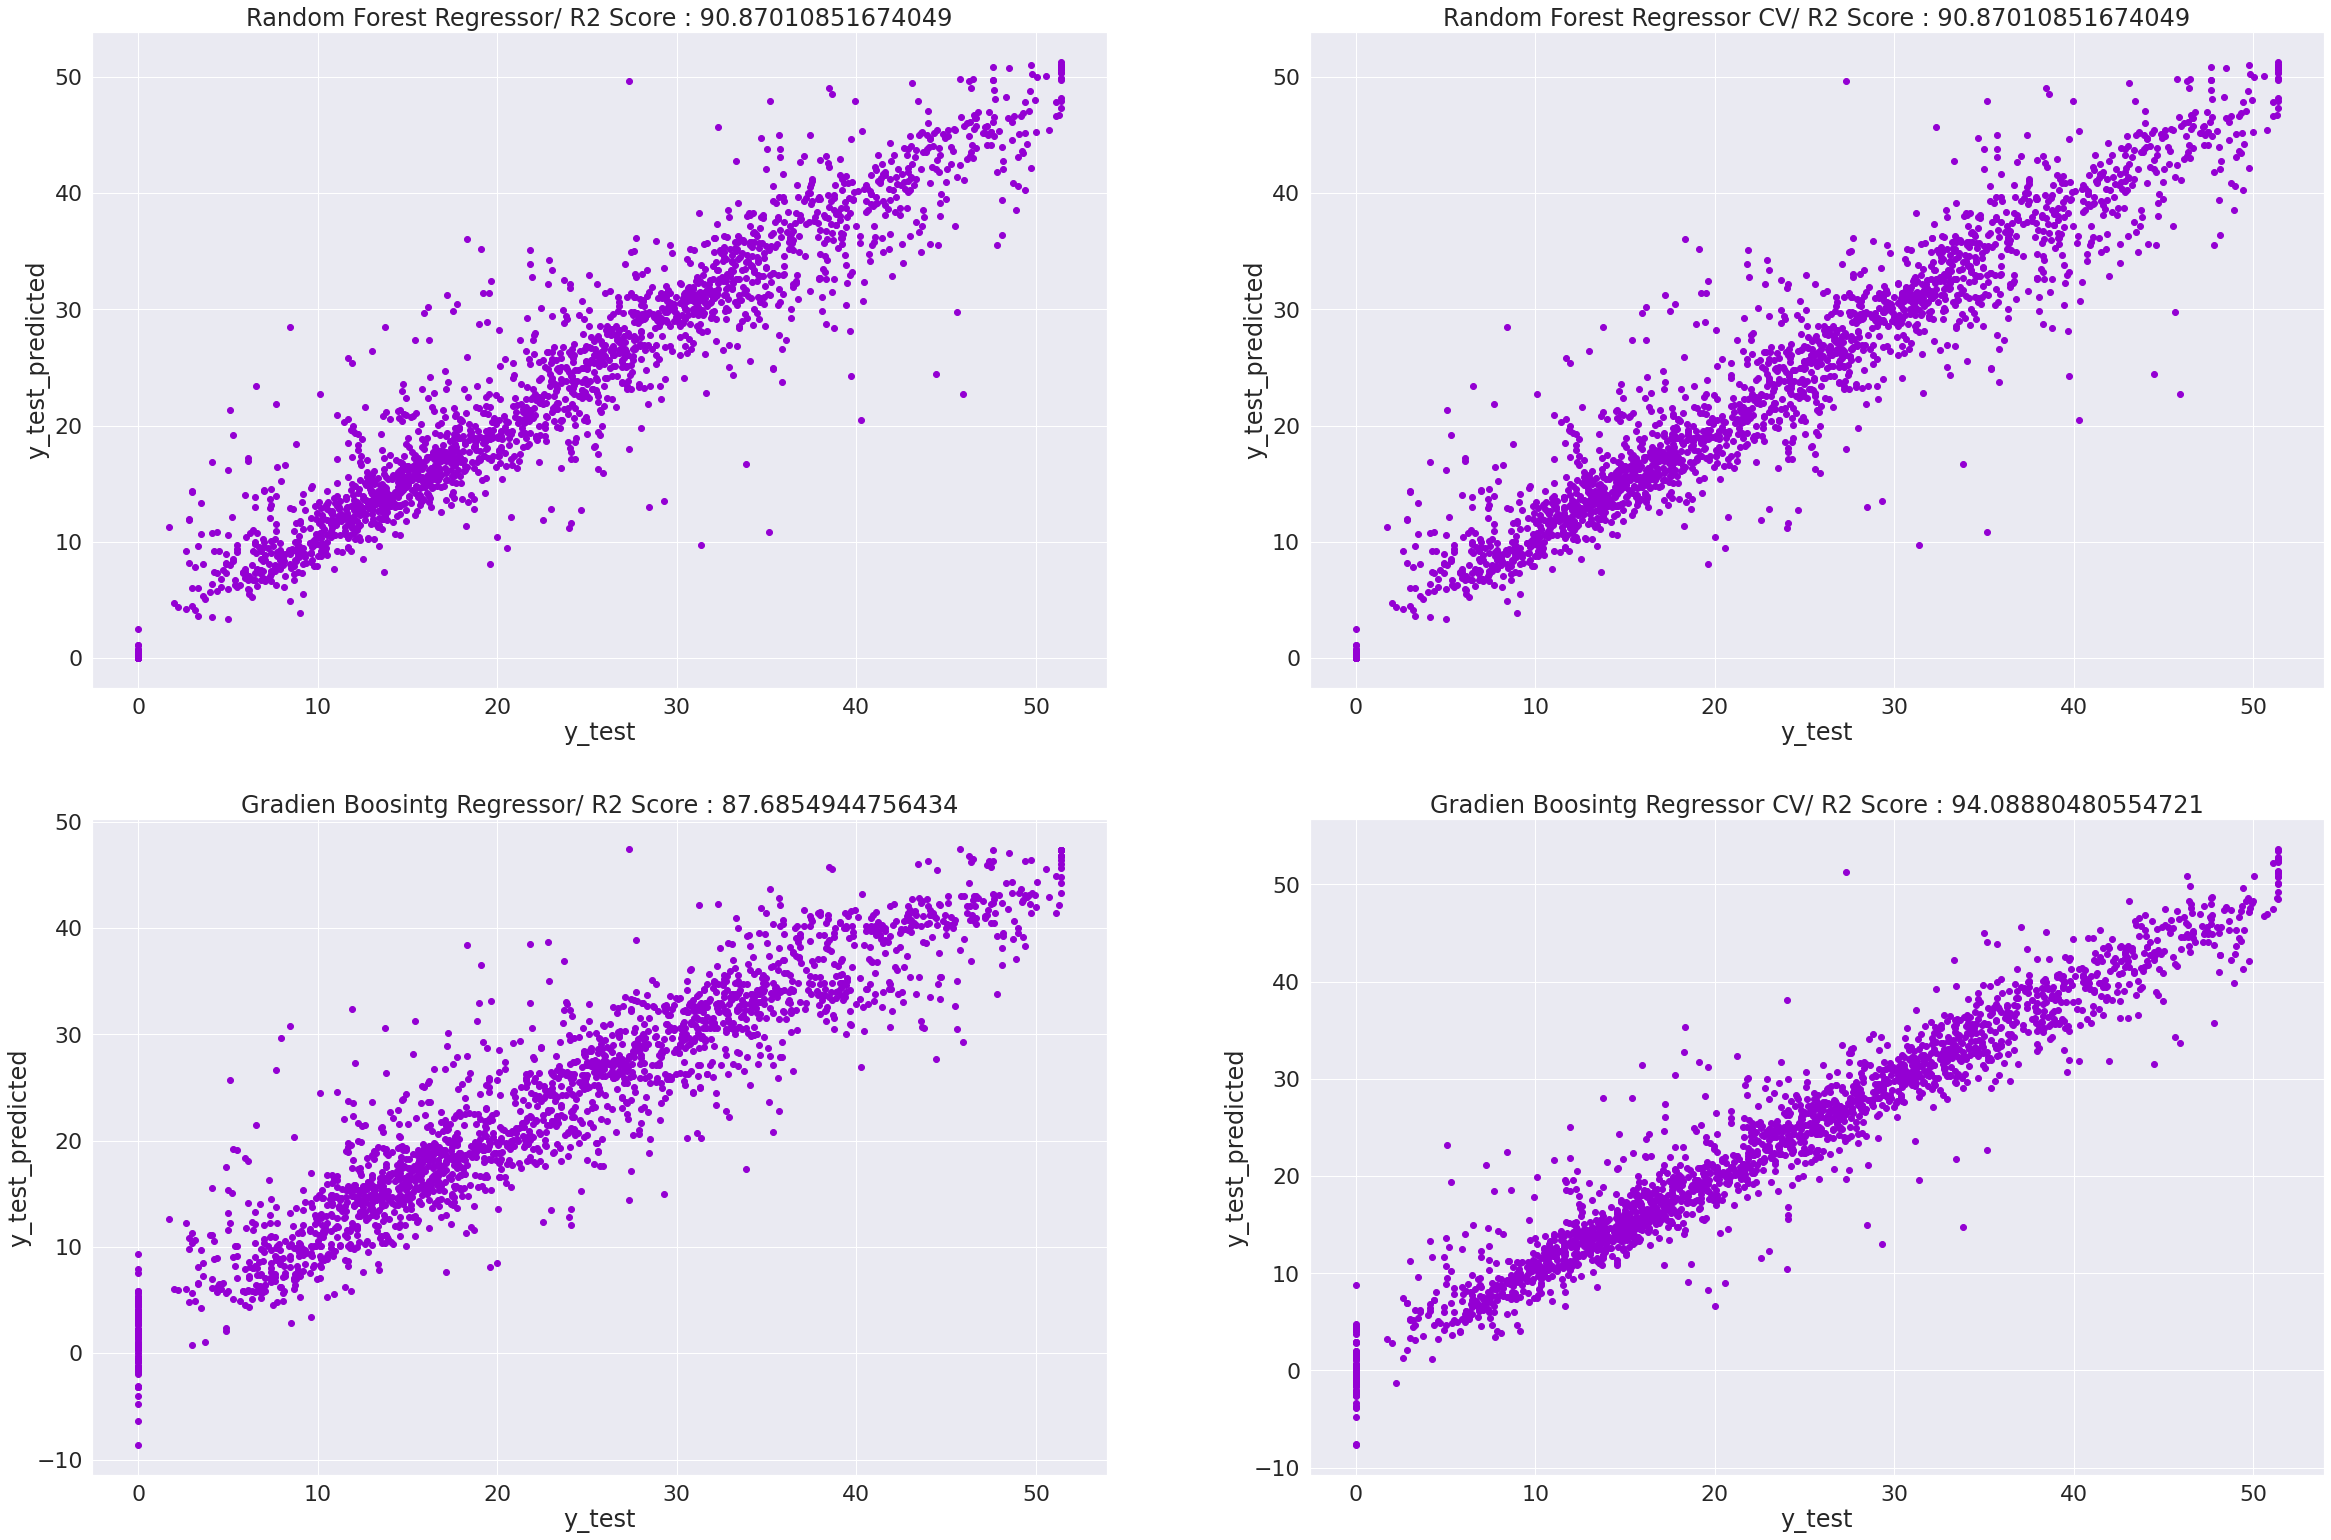

In [104]:
# Visual representation of Decision Tree model's prediction

lst_model = [y_test_rfr_pred,y_test_rfr_cv_pred,y_test_gbr_pred,y_test_gbr_cv_pred]
title = ['Random Forest Regressor','Random Forest Regressor CV','Gradien Boosintg Regressor','Gradien Boosintg Regressor CV']
lst_model_acc = [r2_score(y_test,y_test_rfr_cv_pred)*100,r2_score(y_test,y_test_rfr_cv_pred)*100,
                 r2_score(y_test,y_test_gbr_pred)*100,r2_score(y_test,y_test_gbr_cv_pred)*100]
plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_model):
  sns.set(font_scale = 2)
  plt.subplot(5, 2,i[0]+1)
  plt.xlabel('y_test')
  plt.ylabel('y_test_predicted')
  plt.title(title[i[0]] + '/ R2 Score : '+ str(lst_model_acc[i[0]]))
  plt.scatter(y_test,i[1],color = 'darkviolet')

In [105]:
# Feature Importance from Random Forest Regressor
imp_feat_values_rfr = rfrcv.fit(X_train,y_train).feature_importances_

# Feature Importance from Gradient Boosting Regressor
imp_feat_values_gbr = gbrcv.fit(X_train,y_train).feature_importances_

In [ ]:
columns_feat_imp = independent_variables

In [108]:
feat_impt = pd.DataFrame({'Columns' : columns_feat_imp,'Feature_importance_value' : imp_feat_values_rfr})
feat_impt.sort_values(by = 'Feature_importance_value',ascending  = False, inplace = True )

In [109]:
feat_impt.head()

,Columns,Feature_importance_value
0,Temperature(°C),0.325900
38,Functioning Day_Yes,0.165453
1,Humidity(%),0.133395
10,evening_hours,0.122597
4,Solar Radiation (MJ/m2),0.078429


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44],
 <a list of 45 Text major ticklabel objects>)

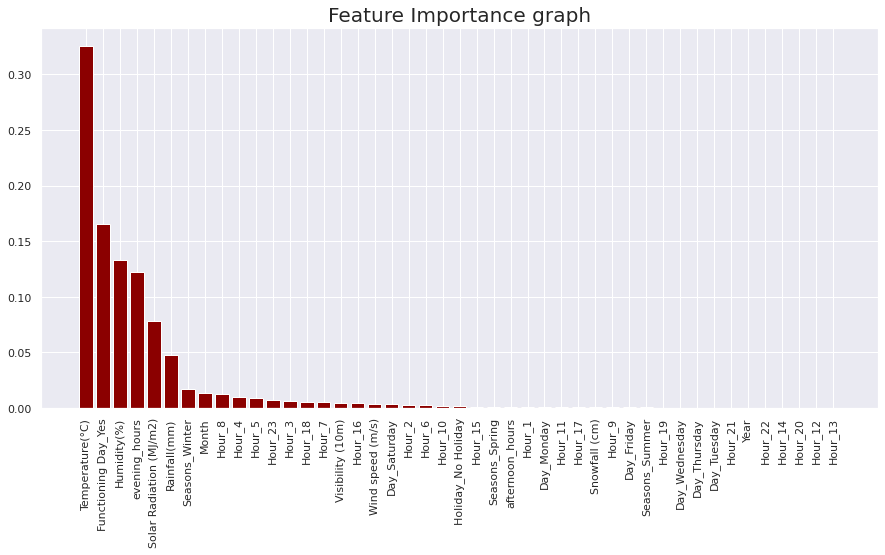

In [115]:
# Visualization of feature importance
plt.figure(figsize = (15,7))
sns.set(font_scale = 1)
plt.bar(feat_impt['Columns'],feat_impt['Feature_importance_value'],color ='darkred')
plt.title('Feature Importance graph',fontsize = 20)
plt.xticks(rotation=90)

In [112]:
imp=gbrcv.fit(X_train,y_train).feature_importances_

In [122]:
imp_dict = {'Feature' : independent_variables,'Contribution percentage' : imp}

imp_df = pd.DataFrame(imp_dict)
imp_df['Contribution percentage'] = round(imp_df['Contribution percentage'],2)
imp_df.sort_values(by=['Contribution percentage'],ascending=False,inplace=True)

Text(0.5, 1.0, 'Feature Importance')

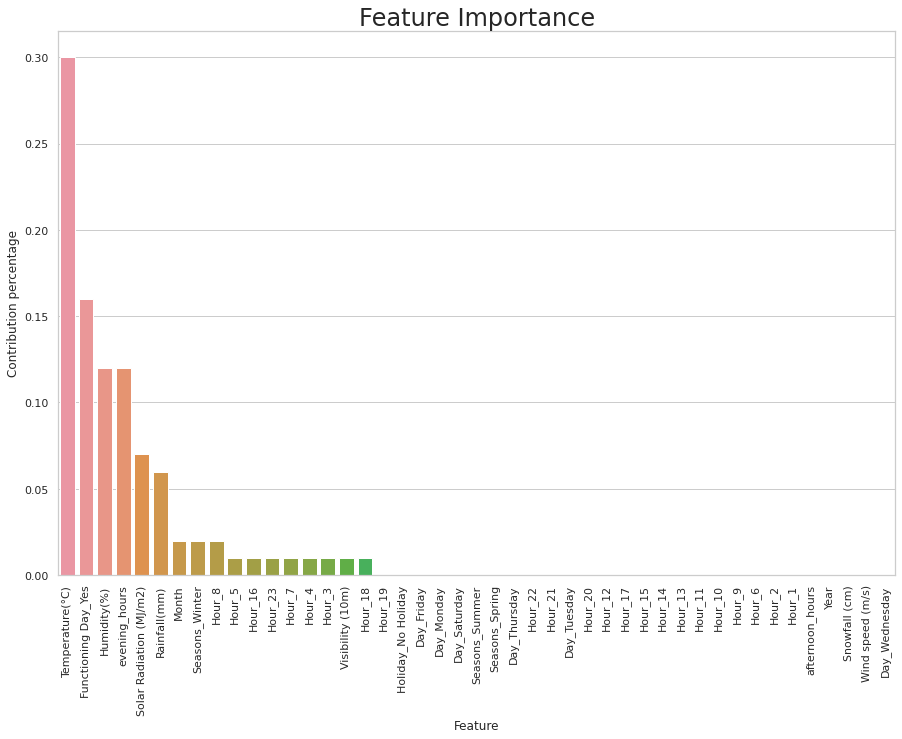

In [127]:
plt.figure(figsize = (15, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x='Feature', y='Contribution percentage', data=imp_df)
plt.xticks(rotation=90)
plt.title('Feature Importance',fontdict= { 'fontsize': 24})

In [ ]:
#function y_pred and y_test

i= int(input("Enter Number: "))
#b=X_test1.iloc[i].to_list()
X_train1,X_test1,y_train1,y_test1=train_test_split(X1,y1,test_size=0.25,random_state=0)
model=gbr.fit(X_train1,y_train1)
y_p_test=model.predict(X_test1)
print(y_p_test[i])
ll=y_test.to_list()
print(ll[i])

Enter Number: 53
13.80963773672992
12.041594578792296
